In [1]:
# Packages laden
import pandas as pd
import numpy as np
from keras.layers import Convolution1D, Dense, MaxPooling1D, Flatten, Dropout
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from keras.backend import binary_crossentropy
from matplotlib import pyplot as plt
from math import sqrt

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# laden der Daten
DATA_FILE="Dropbox/Masterarbeit/Masterarbeit/Datensätze/Geburtenrate/Datensatz.xlsx"
df = pd.read_excel(DATA_FILE)
df=pd.read_excel(DATA_FILE, header=0, parse_dates=[0], index_col='Jahr-Monat',squeeze=True,)

In [3]:
# Ein array mit allen Einträgen --> zur besseren Weiterverarbeitung
ZR=df.values

In [4]:
# Anteil der Datensätze am Gesamtdatensatz
ZR_100=ZR
ZR_46=ZR[-400:]
ZR_12=ZR[-100:]

In [5]:
# Preprocessing der Rohdaten: 100%
ZR_100new=np.atleast_2d(ZR_100)
if ZR_100new.shape[0]==1:
    ZR_100new=ZR_100new.T
nb_samples_100, nb_series_100 = ZR_100new.shape

In [6]:
# Preprocessing der Rohdaten: 46%
ZR_46new=np.atleast_2d(ZR_46)
if ZR_46new.shape[0]==1:
    ZR_46new=ZR_46new.T
nb_samples_46, nb_series_46 = ZR_46new.shape

In [7]:
# Preprocessing der Rohdaten: 12%
ZR_12new=np.atleast_2d(ZR_12)
if ZR_12new.shape[0]==1:
    ZR_12new=ZR_12new.T
nb_samples_12, nb_series_12 = ZR_12new.shape

In [8]:
# Einteilung in Trainings- und Testdaten
test_size_100=int(0.3*nb_samples_100)
train_100, test_100 = ZR_100[:-test_size_100], ZR_100[-test_size_100:] 

test_size_46=int(0.35*nb_samples_46)
train_46, test_46 = ZR_46[:-test_size_46], ZR_46[-test_size_46:]

test_size_12=int(0.35*nb_samples_12)
train_12, test_12 = ZR_12[:-test_size_12], ZR_12[-test_size_12:]

In [9]:
# Form des Input und Outputs anpassen: 100%
look_forward=1
window_size=12
# Trainingsdaten
Xtrain_100=np.atleast_3d(np.array([train_100[start:start+window_size] for start in range(0, train_100.shape[0]-(window_size+look_forward))]))
ytrain_100=train_100[window_size+look_forward:]
qtrain_100=np.atleast_3d([train_100[-(window_size):]])
print(qtrain_100.shape, ytrain_100.shape, Xtrain_100.shape)

# Testdaten
Xtest_100=np.atleast_3d(np.array([test_100[start:start+window_size] for start in range(0, test_100.shape[0]-(window_size+look_forward))]))
ytest_100=test_100[window_size+look_forward:]
qtest_100=np.atleast_3d([test_100[-(window_size):]])
print(qtest_100.shape, ytest_100.shape, Xtest_100.shape)

(1, 12, 1) (592,) (592, 12, 1)
(1, 12, 1) (245,) (245, 12, 1)


In [10]:
# Form des Input und Outputs anpassen: 46%
# Trainingsdaten
Xtrain_46=np.atleast_3d(np.array([train_46[start:start+window_size] for start in range(0, train_46.shape[0]-(window_size+look_forward))]))
ytrain_46=train_46[window_size+look_forward:]
qtrain_46=np.atleast_3d([train_46[-(window_size):]])
print(qtrain_46.shape, ytrain_46.shape, Xtrain_46.shape)

# Testdaten
Xtest_46=np.atleast_3d(np.array([test_46[start:start+window_size] for start in range(0, test_46.shape[0]-(window_size+look_forward))]))
ytest_46=test_46[window_size+look_forward:]
qtest_46=np.atleast_3d([test_46[-(window_size):]])
print(qtest_46.shape, ytest_46.shape, Xtest_46.shape)

(1, 12, 1) (247,) (247, 12, 1)
(1, 12, 1) (127,) (127, 12, 1)


In [11]:
# Form des Input und Outputs anpassen: 12%
# Trainingsdaten
Xtrain_12=np.atleast_3d(np.array([train_12[start:start+window_size] for start in range(0, train_12.shape[0]-(window_size+look_forward))]))
ytrain_12=train_12[window_size+look_forward:]
qtrain_12=np.atleast_3d([train_12[-(window_size):]])
print(qtrain_12.shape, ytrain_12.shape, Xtrain_12.shape)

# Testdaten
Xtest_12=np.atleast_3d(np.array([test_12[start:start+window_size] for start in range(0, test_12.shape[0]-(window_size+look_forward))]))
ytest_12=test_12[window_size+look_forward:]
qtest_12=np.atleast_3d([test_12[-(window_size):]])
print(qtest_12.shape, ytest_12.shape, Xtest_12.shape)

(1, 12, 1) (52,) (52, 12, 1)
(1, 12, 1) (22,) (22, 12, 1)


In [12]:
# Modell zusammenbauen: 
nb_filter_1=32
nb_filter_2=64
nb_filter_3=64
filter_length=2
nb_input_series=1
nb_outputs=1
model= Sequential()
model.add(Convolution1D(nb_filter=nb_filter_1, filter_length=filter_length, activation='relu', 
                        input_shape=(window_size, nb_input_series)))
model.add(Convolution1D(nb_filter=nb_filter_2, filter_length=filter_length, activation='relu'))
model.add(MaxPooling1D())
model.add(Convolution1D(nb_filter=nb_filter_3, filter_length=filter_length, activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(nb_outputs, activation='linear')) 
model.compile(loss='mse', optimizer='adam', metrics=['mae']) 

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", input_shape=(12, 1), filters=32, kernel_size=2)`
  # Remove the CWD from sys.path while we load stuff.


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=64, kernel_size=2)`
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=64, kernel_size=2)`
  del sys.path[0]


In [13]:
# Modellzusammenfassung
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 11, 32)            96        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4, 64)             8256      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

In [16]:
k =20
test_MSE=[0]*k
for i in range(k):
    np.random.seed(i)
    model.fit(Xtrain_100, ytrain_100, epochs=200, batch_size=25, verbose=2,validation_data=(Xtest_100, ytest_100))
    testPredict_100 = model.predict(Xtest_100)
    test_MSE[i]=mean_squared_error(ytest_100,testPredict_100)

Train on 592 samples, validate on 245 samples
Epoch 1/200
 - 0s - loss: 70086036.0203 - mean_absolute_error: 6542.6613 - val_loss: 14912088.7347 - val_mean_absolute_error: 3264.0717
Epoch 2/200
 - 0s - loss: 79182360.2297 - mean_absolute_error: 6899.7604 - val_loss: 13460955.3265 - val_mean_absolute_error: 3081.3109
Epoch 3/200
 - 0s - loss: 73311340.9054 - mean_absolute_error: 6805.9200 - val_loss: 13676006.9184 - val_mean_absolute_error: 3079.1074
Epoch 4/200
 - 0s - loss: 68871103.0507 - mean_absolute_error: 6489.4107 - val_loss: 12054154.1633 - val_mean_absolute_error: 2864.0665
Epoch 5/200
 - 0s - loss: 72521990.9595 - mean_absolute_error: 6699.7175 - val_loss: 16906599.8980 - val_mean_absolute_error: 3509.6208
Epoch 6/200
 - 0s - loss: 70413275.7095 - mean_absolute_error: 6680.9025 - val_loss: 14817507.2041 - val_mean_absolute_error: 3043.0370
Epoch 7/200
 - 0s - loss: 87112466.9291 - mean_absolute_error: 7236.6249 - val_loss: 13670857.6735 - val_mean_absolute_error: 3120.6379
Ep

Epoch 61/200
 - 0s - loss: 82559082.4257 - mean_absolute_error: 7064.3498 - val_loss: 14940476.2245 - val_mean_absolute_error: 3058.5204
Epoch 62/200
 - 0s - loss: 72195443.9155 - mean_absolute_error: 6621.1992 - val_loss: 13901839.4694 - val_mean_absolute_error: 3127.2909
Epoch 63/200
 - 0s - loss: 72336120.2095 - mean_absolute_error: 6725.8682 - val_loss: 15052100.6122 - val_mean_absolute_error: 3275.1617
Epoch 64/200
 - 0s - loss: 80856152.3345 - mean_absolute_error: 7113.7842 - val_loss: 14458776.9796 - val_mean_absolute_error: 3018.5865
Epoch 65/200
 - 0s - loss: 83318976.8446 - mean_absolute_error: 7153.2941 - val_loss: 15107432.3878 - val_mean_absolute_error: 3274.0293
Epoch 66/200
 - 0s - loss: 67170990.8919 - mean_absolute_error: 6407.5363 - val_loss: 12450057.8367 - val_mean_absolute_error: 2919.1498
Epoch 67/200
 - 0s - loss: 74849689.9527 - mean_absolute_error: 6764.4139 - val_loss: 15476944.6122 - val_mean_absolute_error: 3318.5953
Epoch 68/200
 - 0s - loss: 77719911.4054 

Epoch 121/200
 - 0s - loss: 72759049.8446 - mean_absolute_error: 6699.4602 - val_loss: 16578580.2857 - val_mean_absolute_error: 3435.3628
Epoch 122/200
 - 0s - loss: 81267537.5405 - mean_absolute_error: 7063.5294 - val_loss: 12916128.0204 - val_mean_absolute_error: 2921.6267
Epoch 123/200
 - 0s - loss: 71347219.0473 - mean_absolute_error: 6611.7219 - val_loss: 14973722.8367 - val_mean_absolute_error: 3269.6212
Epoch 124/200
 - 0s - loss: 73001440.5946 - mean_absolute_error: 6794.0303 - val_loss: 14324748.8367 - val_mean_absolute_error: 3043.1496
Epoch 125/200
 - 0s - loss: 67698471.9257 - mean_absolute_error: 6351.8301 - val_loss: 13586298.6531 - val_mean_absolute_error: 3080.5504
Epoch 126/200
 - 0s - loss: 73976553.8378 - mean_absolute_error: 6796.5365 - val_loss: 12987610.1633 - val_mean_absolute_error: 3004.6267
Epoch 127/200
 - 0s - loss: 74443552.2703 - mean_absolute_error: 6811.0200 - val_loss: 13629309.4286 - val_mean_absolute_error: 2968.2189
Epoch 128/200
 - 0s - loss: 704889

Epoch 181/200
 - 0s - loss: 73984946.7568 - mean_absolute_error: 6814.9813 - val_loss: 15732215.1633 - val_mean_absolute_error: 3349.3645
Epoch 182/200
 - 0s - loss: 75644329.3514 - mean_absolute_error: 6866.4502 - val_loss: 14309632.8163 - val_mean_absolute_error: 3036.7437
Epoch 183/200
 - 0s - loss: 73776463.0946 - mean_absolute_error: 6776.2361 - val_loss: 13805830.4082 - val_mean_absolute_error: 3125.6014
Epoch 184/200
 - 0s - loss: 67795461.7027 - mean_absolute_error: 6511.5546 - val_loss: 12404724.4490 - val_mean_absolute_error: 2910.6490
Epoch 185/200
 - 0s - loss: 71676713.2838 - mean_absolute_error: 6602.8856 - val_loss: 15896794.4898 - val_mean_absolute_error: 3349.5002
Epoch 186/200
 - 0s - loss: 70902476.1115 - mean_absolute_error: 6614.6693 - val_loss: 13481723.0816 - val_mean_absolute_error: 2987.9261
Epoch 187/200
 - 0s - loss: 74568169.7872 - mean_absolute_error: 6819.3628 - val_loss: 14103552.0612 - val_mean_absolute_error: 3158.6766
Epoch 188/200
 - 0s - loss: 787669

Epoch 41/200
 - 0s - loss: 75952107.0676 - mean_absolute_error: 7092.3692 - val_loss: 14957586.5714 - val_mean_absolute_error: 3139.8839
Epoch 42/200
 - 0s - loss: 73172523.0845 - mean_absolute_error: 6796.3629 - val_loss: 13471214.7143 - val_mean_absolute_error: 3022.4304
Epoch 43/200
 - 0s - loss: 79471951.7905 - mean_absolute_error: 7068.4394 - val_loss: 20661619.8163 - val_mean_absolute_error: 3782.6013
Epoch 44/200
 - 0s - loss: 76183274.6250 - mean_absolute_error: 6728.2343 - val_loss: 14481978.7347 - val_mean_absolute_error: 3182.4417
Epoch 45/200
 - 0s - loss: 77702871.5811 - mean_absolute_error: 6935.1490 - val_loss: 16654997.7551 - val_mean_absolute_error: 3207.6428
Epoch 46/200
 - 0s - loss: 82323563.2230 - mean_absolute_error: 7263.0127 - val_loss: 20084618.0612 - val_mean_absolute_error: 3735.5045
Epoch 47/200
 - 0s - loss: 83562666.5473 - mean_absolute_error: 7106.8027 - val_loss: 13075620.7551 - val_mean_absolute_error: 2999.5733
Epoch 48/200
 - 0s - loss: 75040926.4595 

Epoch 101/200
 - 0s - loss: 67919092.0980 - mean_absolute_error: 6491.2445 - val_loss: 12813883.2857 - val_mean_absolute_error: 2951.3118
Epoch 102/200
 - 0s - loss: 76008325.0541 - mean_absolute_error: 6699.9118 - val_loss: 14524660.7959 - val_mean_absolute_error: 3064.4993
Epoch 103/200
 - 0s - loss: 74545304.8378 - mean_absolute_error: 6811.7277 - val_loss: 11578907.9184 - val_mean_absolute_error: 2812.4749
Epoch 104/200
 - 0s - loss: 79894332.7297 - mean_absolute_error: 7059.7357 - val_loss: 18285422.3265 - val_mean_absolute_error: 3618.3889
Epoch 105/200
 - 0s - loss: 75123950.2500 - mean_absolute_error: 6842.7575 - val_loss: 13324621.8571 - val_mean_absolute_error: 2978.2758
Epoch 106/200
 - 0s - loss: 83461856.0608 - mean_absolute_error: 7202.5782 - val_loss: 14404026.4898 - val_mean_absolute_error: 3168.0411
Epoch 107/200
 - 0s - loss: 74231731.3581 - mean_absolute_error: 6672.4542 - val_loss: 15221777.6939 - val_mean_absolute_error: 3129.4299
Epoch 108/200
 - 0s - loss: 761112

Epoch 161/200
 - 0s - loss: 76987508.7635 - mean_absolute_error: 6815.7744 - val_loss: 13693469.6735 - val_mean_absolute_error: 3042.0223
Epoch 162/200
 - 0s - loss: 79350679.5878 - mean_absolute_error: 6890.6827 - val_loss: 13905021.5102 - val_mean_absolute_error: 2996.2039
Epoch 163/200
 - 0s - loss: 76302866.2973 - mean_absolute_error: 6966.9180 - val_loss: 12684594.1020 - val_mean_absolute_error: 2927.9163
Epoch 164/200
 - 0s - loss: 75198220.3919 - mean_absolute_error: 6873.6030 - val_loss: 15949052.8367 - val_mean_absolute_error: 3332.4188
Epoch 165/200
 - 0s - loss: 74976356.1081 - mean_absolute_error: 6842.8111 - val_loss: 13376259.2653 - val_mean_absolute_error: 3020.4959
Epoch 166/200
 - 0s - loss: 72210037.8514 - mean_absolute_error: 6760.4085 - val_loss: 13994839.6122 - val_mean_absolute_error: 3130.5370
Epoch 167/200
 - 0s - loss: 68284310.1892 - mean_absolute_error: 6513.8039 - val_loss: 13910542.0612 - val_mean_absolute_error: 3022.1716
Epoch 168/200
 - 0s - loss: 762464

Epoch 21/200
 - 0s - loss: 84193621.6824 - mean_absolute_error: 7147.3196 - val_loss: 13705335.0204 - val_mean_absolute_error: 3072.4658
Epoch 22/200
 - 0s - loss: 68504734.4730 - mean_absolute_error: 6505.5960 - val_loss: 13324137.2245 - val_mean_absolute_error: 2976.9945
Epoch 23/200
 - 0s - loss: 69244677.5642 - mean_absolute_error: 6595.3404 - val_loss: 13308723.8571 - val_mean_absolute_error: 2979.1553
Epoch 24/200
 - 0s - loss: 65978231.5304 - mean_absolute_error: 6348.6149 - val_loss: 13800929.8776 - val_mean_absolute_error: 3048.2777
Epoch 25/200
 - 0s - loss: 73466235.3277 - mean_absolute_error: 6677.7399 - val_loss: 13260999.7755 - val_mean_absolute_error: 2998.5976
Epoch 26/200
 - 0s - loss: 80864786.3547 - mean_absolute_error: 7005.1790 - val_loss: 13903532.9592 - val_mean_absolute_error: 3105.5912
Epoch 27/200
 - 0s - loss: 82805247.2635 - mean_absolute_error: 7087.2507 - val_loss: 13450421.7959 - val_mean_absolute_error: 3014.8803
Epoch 28/200
 - 0s - loss: 74447663.7365 

Epoch 81/200
 - 0s - loss: 74782296.8311 - mean_absolute_error: 6883.3426 - val_loss: 13072433.1837 - val_mean_absolute_error: 2979.2467
Epoch 82/200
 - 0s - loss: 67861176.0338 - mean_absolute_error: 6476.0901 - val_loss: 12562909.0408 - val_mean_absolute_error: 2928.1752
Epoch 83/200
 - 0s - loss: 67790117.3041 - mean_absolute_error: 6485.9088 - val_loss: 13801132.8163 - val_mean_absolute_error: 3083.1835
Epoch 84/200
 - 0s - loss: 77323214.0811 - mean_absolute_error: 6847.3408 - val_loss: 12343520.5714 - val_mean_absolute_error: 2910.4936
Epoch 85/200
 - 0s - loss: 73257886.9054 - mean_absolute_error: 6804.8179 - val_loss: 15721563.0000 - val_mean_absolute_error: 3283.1454
Epoch 86/200
 - 0s - loss: 70397452.5946 - mean_absolute_error: 6570.8014 - val_loss: 14501889.5510 - val_mean_absolute_error: 3091.7611
Epoch 87/200
 - 0s - loss: 74571623.7905 - mean_absolute_error: 6776.2179 - val_loss: 14631638.9796 - val_mean_absolute_error: 3169.6762
Epoch 88/200
 - 0s - loss: 75534195.3243 

Epoch 141/200
 - 0s - loss: 76570057.2770 - mean_absolute_error: 6838.5290 - val_loss: 12859617.5306 - val_mean_absolute_error: 2959.5763
Epoch 142/200
 - 0s - loss: 72790301.7297 - mean_absolute_error: 6518.1476 - val_loss: 12046149.4694 - val_mean_absolute_error: 2884.3130
Epoch 143/200
 - 0s - loss: 71157606.7432 - mean_absolute_error: 6661.7153 - val_loss: 13866805.4286 - val_mean_absolute_error: 3103.7771
Epoch 144/200
 - 0s - loss: 75577472.5845 - mean_absolute_error: 6665.7479 - val_loss: 14706230.1633 - val_mean_absolute_error: 3089.3254
Epoch 145/200
 - 0s - loss: 78191914.6284 - mean_absolute_error: 6936.6528 - val_loss: 17696386.2449 - val_mean_absolute_error: 3499.4442
Epoch 146/200
 - 0s - loss: 80859472.7365 - mean_absolute_error: 7077.1769 - val_loss: 13425519.8163 - val_mean_absolute_error: 3026.4914
Epoch 147/200
 - 0s - loss: 82508336.2297 - mean_absolute_error: 7002.5221 - val_loss: 12844318.5306 - val_mean_absolute_error: 2950.1289
Epoch 148/200
 - 0s - loss: 729225

Train on 592 samples, validate on 245 samples
Epoch 1/200
 - 0s - loss: 69843380.3716 - mean_absolute_error: 6362.5279 - val_loss: 13483008.2041 - val_mean_absolute_error: 3056.4308
Epoch 2/200
 - 0s - loss: 84300868.2027 - mean_absolute_error: 7117.1531 - val_loss: 15115815.0408 - val_mean_absolute_error: 3228.6152
Epoch 3/200
 - 0s - loss: 69318187.7703 - mean_absolute_error: 6567.3556 - val_loss: 14293647.9184 - val_mean_absolute_error: 3119.3046
Epoch 4/200
 - 0s - loss: 73362273.8108 - mean_absolute_error: 6757.1153 - val_loss: 13128199.4898 - val_mean_absolute_error: 2962.8754
Epoch 5/200
 - 0s - loss: 78157655.6453 - mean_absolute_error: 6922.6539 - val_loss: 12779422.2449 - val_mean_absolute_error: 2956.9334
Epoch 6/200
 - 0s - loss: 76239136.2230 - mean_absolute_error: 6882.6846 - val_loss: 14636986.3061 - val_mean_absolute_error: 3185.1854
Epoch 7/200
 - 0s - loss: 62208009.9797 - mean_absolute_error: 6306.9736 - val_loss: 13012184.6531 - val_mean_absolute_error: 2986.0205
Ep

Epoch 61/200
 - 0s - loss: 75128816.4865 - mean_absolute_error: 6941.4177 - val_loss: 16312818.0000 - val_mean_absolute_error: 3304.5920
Epoch 62/200
 - 0s - loss: 76456938.6959 - mean_absolute_error: 6986.1702 - val_loss: 13044307.6939 - val_mean_absolute_error: 2964.8841
Epoch 63/200
 - 0s - loss: 71925868.9932 - mean_absolute_error: 6672.0082 - val_loss: 14356904.5510 - val_mean_absolute_error: 3043.9131
Epoch 64/200
 - 0s - loss: 76659918.2095 - mean_absolute_error: 6898.6410 - val_loss: 13372227.8163 - val_mean_absolute_error: 2984.2185
Epoch 65/200
 - 0s - loss: 75223387.4730 - mean_absolute_error: 6758.1796 - val_loss: 14849334.0816 - val_mean_absolute_error: 3176.5794
Epoch 66/200
 - 0s - loss: 72885565.7230 - mean_absolute_error: 6818.1443 - val_loss: 17406355.3469 - val_mean_absolute_error: 3384.9193
Epoch 67/200
 - 0s - loss: 75844519.7500 - mean_absolute_error: 6835.8580 - val_loss: 13356017.3673 - val_mean_absolute_error: 3005.9499
Epoch 68/200
 - 0s - loss: 80318273.1554 

Epoch 121/200
 - 0s - loss: 79370255.4527 - mean_absolute_error: 6872.2073 - val_loss: 16611865.1837 - val_mean_absolute_error: 3299.5448
Epoch 122/200
 - 0s - loss: 78772293.2838 - mean_absolute_error: 6909.3498 - val_loss: 12918583.2041 - val_mean_absolute_error: 2956.8379
Epoch 123/200
 - 0s - loss: 71686895.8446 - mean_absolute_error: 6744.5624 - val_loss: 13343196.1837 - val_mean_absolute_error: 2980.6461
Epoch 124/200
 - 0s - loss: 74672520.3041 - mean_absolute_error: 6703.4598 - val_loss: 17819731.4898 - val_mean_absolute_error: 3523.5878
Epoch 125/200
 - 0s - loss: 80662664.4932 - mean_absolute_error: 7131.0816 - val_loss: 14179386.4286 - val_mean_absolute_error: 3120.8218
Epoch 126/200
 - 0s - loss: 73099096.6284 - mean_absolute_error: 6664.5677 - val_loss: 13772462.0408 - val_mean_absolute_error: 3016.8832
Epoch 127/200
 - 0s - loss: 70349059.6757 - mean_absolute_error: 6493.7919 - val_loss: 12735237.8163 - val_mean_absolute_error: 2947.1652
Epoch 128/200
 - 0s - loss: 736139

Epoch 181/200
 - 0s - loss: 82861908.1554 - mean_absolute_error: 7124.2966 - val_loss: 14856378.1837 - val_mean_absolute_error: 3105.2118
Epoch 182/200
 - 0s - loss: 68686276.8041 - mean_absolute_error: 6601.0668 - val_loss: 12041977.1837 - val_mean_absolute_error: 2879.3854
Epoch 183/200
 - 0s - loss: 73137924.3649 - mean_absolute_error: 6709.6014 - val_loss: 12931750.5102 - val_mean_absolute_error: 2990.4675
Epoch 184/200
 - 0s - loss: 78286916.4645 - mean_absolute_error: 6817.0912 - val_loss: 13003859.1429 - val_mean_absolute_error: 2958.6848
Epoch 185/200
 - 0s - loss: 77640519.8243 - mean_absolute_error: 6960.0508 - val_loss: 13656014.5714 - val_mean_absolute_error: 3075.7020
Epoch 186/200
 - 0s - loss: 75735503.3581 - mean_absolute_error: 6921.6595 - val_loss: 13152732.6122 - val_mean_absolute_error: 2986.3230
Epoch 187/200
 - 0s - loss: 65817984.2365 - mean_absolute_error: 6368.9261 - val_loss: 13137668.7143 - val_mean_absolute_error: 2988.8259
Epoch 188/200
 - 0s - loss: 700090

Epoch 41/200
 - 0s - loss: 69234799.8378 - mean_absolute_error: 6623.1275 - val_loss: 13312326.6122 - val_mean_absolute_error: 3009.0305
Epoch 42/200
 - 0s - loss: 71120067.6959 - mean_absolute_error: 6737.1692 - val_loss: 12482232.5918 - val_mean_absolute_error: 2919.7748
Epoch 43/200
 - 0s - loss: 68939531.2568 - mean_absolute_error: 6511.6781 - val_loss: 13394172.2653 - val_mean_absolute_error: 3028.6756
Epoch 44/200
 - 0s - loss: 77914309.6351 - mean_absolute_error: 7043.9323 - val_loss: 14001310.9796 - val_mean_absolute_error: 3138.3997
Epoch 45/200
 - 0s - loss: 70289127.1014 - mean_absolute_error: 6606.3816 - val_loss: 12655748.5510 - val_mean_absolute_error: 2942.1618
Epoch 46/200
 - 0s - loss: 73921639.1216 - mean_absolute_error: 6765.7322 - val_loss: 13328297.5306 - val_mean_absolute_error: 3019.9248
Epoch 47/200
 - 0s - loss: 71781382.0068 - mean_absolute_error: 6662.1854 - val_loss: 12453848.8367 - val_mean_absolute_error: 2916.3448
Epoch 48/200
 - 0s - loss: 74200805.4054 

Epoch 101/200
 - 0s - loss: 76769989.8986 - mean_absolute_error: 6786.6986 - val_loss: 13313065.5918 - val_mean_absolute_error: 2980.0291
Epoch 102/200
 - 0s - loss: 73845512.7770 - mean_absolute_error: 6834.0409 - val_loss: 13461804.4694 - val_mean_absolute_error: 3032.9781
Epoch 103/200
 - 0s - loss: 64301485.2669 - mean_absolute_error: 6223.4983 - val_loss: 12525807.2449 - val_mean_absolute_error: 2935.4125
Epoch 104/200
 - 0s - loss: 74835211.8176 - mean_absolute_error: 6841.2062 - val_loss: 12371678.9592 - val_mean_absolute_error: 2917.2075
Epoch 105/200
 - 0s - loss: 76847717.7399 - mean_absolute_error: 6805.4039 - val_loss: 13054072.8163 - val_mean_absolute_error: 2962.4702
Epoch 106/200
 - 0s - loss: 77107225.4223 - mean_absolute_error: 6880.9513 - val_loss: 15697452.9796 - val_mean_absolute_error: 3184.5658
Epoch 107/200
 - 0s - loss: 74200069.4324 - mean_absolute_error: 6886.4076 - val_loss: 12582193.7143 - val_mean_absolute_error: 2939.6396
Epoch 108/200
 - 0s - loss: 761936

Epoch 161/200
 - 0s - loss: 75586986.1149 - mean_absolute_error: 6779.7996 - val_loss: 14144725.7959 - val_mean_absolute_error: 3150.7791
Epoch 162/200
 - 0s - loss: 71869803.9122 - mean_absolute_error: 6638.8500 - val_loss: 12628004.4694 - val_mean_absolute_error: 2929.5487
Epoch 163/200
 - 0s - loss: 71952361.3446 - mean_absolute_error: 6706.0035 - val_loss: 15702490.3673 - val_mean_absolute_error: 3199.7283
Epoch 164/200
 - 0s - loss: 78602579.2027 - mean_absolute_error: 7042.0422 - val_loss: 13682386.6531 - val_mean_absolute_error: 3074.8560
Epoch 165/200
 - 0s - loss: 71681514.5169 - mean_absolute_error: 6611.8750 - val_loss: 12791423.5306 - val_mean_absolute_error: 2955.2225
Epoch 166/200
 - 0s - loss: 73130923.2027 - mean_absolute_error: 6604.1696 - val_loss: 12260588.5510 - val_mean_absolute_error: 2893.1861
Epoch 167/200
 - 0s - loss: 68097385.7095 - mean_absolute_error: 6454.9634 - val_loss: 12680353.3061 - val_mean_absolute_error: 2939.4124
Epoch 168/200
 - 0s - loss: 802195

Epoch 21/200
 - 0s - loss: 72135660.7973 - mean_absolute_error: 6761.3261 - val_loss: 14726526.5510 - val_mean_absolute_error: 3161.6987
Epoch 22/200
 - 0s - loss: 77232410.6689 - mean_absolute_error: 7031.8939 - val_loss: 17196777.0612 - val_mean_absolute_error: 3357.2464
Epoch 23/200
 - 0s - loss: 77348022.3649 - mean_absolute_error: 6830.7495 - val_loss: 15586937.5510 - val_mean_absolute_error: 3266.1166
Epoch 24/200
 - 0s - loss: 76410897.5473 - mean_absolute_error: 6808.6240 - val_loss: 12809869.4082 - val_mean_absolute_error: 2949.2351
Epoch 25/200
 - 0s - loss: 73800915.4257 - mean_absolute_error: 6637.6002 - val_loss: 14639251.4898 - val_mean_absolute_error: 3078.2687
Epoch 26/200
 - 0s - loss: 77431756.3108 - mean_absolute_error: 6865.6901 - val_loss: 12992030.6122 - val_mean_absolute_error: 2956.2696
Epoch 27/200
 - 0s - loss: 73425026.7905 - mean_absolute_error: 6715.2153 - val_loss: 13007416.1429 - val_mean_absolute_error: 2984.7963
Epoch 28/200
 - 0s - loss: 70673887.6959 

Epoch 81/200
 - 0s - loss: 68511984.9392 - mean_absolute_error: 6536.1558 - val_loss: 17030490.1020 - val_mean_absolute_error: 3411.8609
Epoch 82/200
 - 0s - loss: 73449134.3378 - mean_absolute_error: 6750.3017 - val_loss: 13780123.0204 - val_mean_absolute_error: 3053.0280
Epoch 83/200
 - 0s - loss: 81573624.7838 - mean_absolute_error: 7084.8755 - val_loss: 13837915.0000 - val_mean_absolute_error: 3078.4744
Epoch 84/200
 - 0s - loss: 71334583.1216 - mean_absolute_error: 6755.1417 - val_loss: 13675684.6531 - val_mean_absolute_error: 3073.5367
Epoch 85/200
 - 0s - loss: 76437305.8750 - mean_absolute_error: 6808.1658 - val_loss: 12600870.2041 - val_mean_absolute_error: 2947.2476
Epoch 86/200
 - 0s - loss: 84202811.1959 - mean_absolute_error: 7180.2436 - val_loss: 13444322.6327 - val_mean_absolute_error: 3014.8066
Epoch 87/200
 - 0s - loss: 71132723.0473 - mean_absolute_error: 6644.2723 - val_loss: 13816029.8980 - val_mean_absolute_error: 3056.9499
Epoch 88/200
 - 0s - loss: 74285299.3919 

Epoch 141/200
 - 0s - loss: 68449820.6791 - mean_absolute_error: 6426.4082 - val_loss: 12133674.3061 - val_mean_absolute_error: 2876.3339
Epoch 142/200
 - 0s - loss: 71004352.0676 - mean_absolute_error: 6708.1386 - val_loss: 14082410.8776 - val_mean_absolute_error: 3105.9127
Epoch 143/200
 - 0s - loss: 77308002.3851 - mean_absolute_error: 6878.7831 - val_loss: 12439434.0612 - val_mean_absolute_error: 2884.9182
Epoch 144/200
 - 0s - loss: 72102568.0811 - mean_absolute_error: 6658.6493 - val_loss: 12420574.5306 - val_mean_absolute_error: 2895.2182
Epoch 145/200
 - 0s - loss: 74365196.7432 - mean_absolute_error: 6866.4070 - val_loss: 11851979.6939 - val_mean_absolute_error: 2853.3982
Epoch 146/200
 - 0s - loss: 76554212.6486 - mean_absolute_error: 6839.2910 - val_loss: 11560131.7347 - val_mean_absolute_error: 2826.1445
Epoch 147/200
 - 0s - loss: 73813316.1284 - mean_absolute_error: 6861.9972 - val_loss: 13898617.1020 - val_mean_absolute_error: 3046.4282
Epoch 148/200
 - 0s - loss: 709084

Train on 592 samples, validate on 245 samples
Epoch 1/200
 - 0s - loss: 64212083.4696 - mean_absolute_error: 6282.6404 - val_loss: 14229137.5714 - val_mean_absolute_error: 3178.2410
Epoch 2/200
 - 0s - loss: 76323686.9595 - mean_absolute_error: 6889.1068 - val_loss: 12372478.6531 - val_mean_absolute_error: 2907.2701
Epoch 3/200
 - 0s - loss: 71876910.1284 - mean_absolute_error: 6768.9019 - val_loss: 12861977.5510 - val_mean_absolute_error: 2939.7444
Epoch 4/200
 - 0s - loss: 76856787.1689 - mean_absolute_error: 7010.8172 - val_loss: 13112529.3265 - val_mean_absolute_error: 2976.7955
Epoch 5/200
 - 0s - loss: 70763865.7905 - mean_absolute_error: 6724.9079 - val_loss: 13800823.4490 - val_mean_absolute_error: 3088.9783
Epoch 6/200
 - 0s - loss: 76169365.4122 - mean_absolute_error: 6687.2033 - val_loss: 15191441.1429 - val_mean_absolute_error: 3132.0360
Epoch 7/200
 - 0s - loss: 73583688.9324 - mean_absolute_error: 6806.9258 - val_loss: 14462057.2653 - val_mean_absolute_error: 3066.4399
Ep

Epoch 61/200
 - 0s - loss: 63688696.5946 - mean_absolute_error: 6363.8170 - val_loss: 12395456.8571 - val_mean_absolute_error: 2912.8303
Epoch 62/200
 - 0s - loss: 75590329.1453 - mean_absolute_error: 6797.7270 - val_loss: 15638311.8571 - val_mean_absolute_error: 3215.6585
Epoch 63/200
 - 0s - loss: 87388999.0068 - mean_absolute_error: 7359.7662 - val_loss: 12125154.9184 - val_mean_absolute_error: 2902.6489
Epoch 64/200
 - 0s - loss: 68864239.2297 - mean_absolute_error: 6611.0322 - val_loss: 12803883.6735 - val_mean_absolute_error: 2955.0647
Epoch 65/200
 - 0s - loss: 78278116.8378 - mean_absolute_error: 7056.6831 - val_loss: 13270180.7755 - val_mean_absolute_error: 3014.5863
Epoch 66/200
 - 0s - loss: 74526015.8682 - mean_absolute_error: 6790.2916 - val_loss: 12772639.5306 - val_mean_absolute_error: 2962.2479
Epoch 67/200
 - 0s - loss: 78458557.4730 - mean_absolute_error: 6947.5038 - val_loss: 12855269.6122 - val_mean_absolute_error: 2960.9098
Epoch 68/200
 - 0s - loss: 80267411.5338 

Epoch 121/200
 - 0s - loss: 77452496.3885 - mean_absolute_error: 6823.0443 - val_loss: 12724257.4286 - val_mean_absolute_error: 2949.0841
Epoch 122/200
 - 0s - loss: 66591175.4189 - mean_absolute_error: 6241.2826 - val_loss: 13295455.1429 - val_mean_absolute_error: 3020.5257
Epoch 123/200
 - 0s - loss: 76789675.2703 - mean_absolute_error: 6840.5942 - val_loss: 14162375.2653 - val_mean_absolute_error: 3074.7886
Epoch 124/200
 - 0s - loss: 74479385.9764 - mean_absolute_error: 6812.0730 - val_loss: 13036193.4082 - val_mean_absolute_error: 2990.7750
Epoch 125/200
 - 0s - loss: 74068835.8378 - mean_absolute_error: 6851.7006 - val_loss: 13808166.0204 - val_mean_absolute_error: 3090.6932
Epoch 126/200
 - 0s - loss: 71396860.3784 - mean_absolute_error: 6537.2811 - val_loss: 13273230.5510 - val_mean_absolute_error: 3012.4812
Epoch 127/200
 - 0s - loss: 72860617.2905 - mean_absolute_error: 6668.6238 - val_loss: 13210347.2041 - val_mean_absolute_error: 2981.3789
Epoch 128/200
 - 0s - loss: 771588

Epoch 181/200
 - 0s - loss: 76607915.7905 - mean_absolute_error: 7026.1786 - val_loss: 12567955.6939 - val_mean_absolute_error: 2931.7145
Epoch 182/200
 - 0s - loss: 66103752.9122 - mean_absolute_error: 6477.1376 - val_loss: 12394377.7551 - val_mean_absolute_error: 2930.6699
Epoch 183/200
 - 0s - loss: 70174143.2973 - mean_absolute_error: 6554.7516 - val_loss: 13623145.2041 - val_mean_absolute_error: 3039.1304
Epoch 184/200
 - 0s - loss: 76824289.7297 - mean_absolute_error: 6861.6634 - val_loss: 13612260.5306 - val_mean_absolute_error: 3074.6777
Epoch 185/200
 - 0s - loss: 70113453.8649 - mean_absolute_error: 6657.8542 - val_loss: 14952251.2245 - val_mean_absolute_error: 3217.3892
Epoch 186/200
 - 0s - loss: 72903486.0203 - mean_absolute_error: 6694.0896 - val_loss: 13127058.2245 - val_mean_absolute_error: 2999.3837
Epoch 187/200
 - 0s - loss: 70217757.7365 - mean_absolute_error: 6644.5648 - val_loss: 14367186.4082 - val_mean_absolute_error: 3095.2345
Epoch 188/200
 - 0s - loss: 745855

Epoch 41/200
 - 0s - loss: 70111211.2297 - mean_absolute_error: 6502.3377 - val_loss: 12274473.0612 - val_mean_absolute_error: 2904.7128
Epoch 42/200
 - 0s - loss: 72224739.7872 - mean_absolute_error: 6628.1683 - val_loss: 13876269.3673 - val_mean_absolute_error: 3110.8044
Epoch 43/200
 - 0s - loss: 75478847.1689 - mean_absolute_error: 7009.8998 - val_loss: 13002444.5510 - val_mean_absolute_error: 2962.7990
Epoch 44/200
 - 0s - loss: 74266983.7230 - mean_absolute_error: 6737.4564 - val_loss: 12278833.3878 - val_mean_absolute_error: 2910.5151
Epoch 45/200
 - 0s - loss: 71125261.3919 - mean_absolute_error: 6667.4768 - val_loss: 13203328.8776 - val_mean_absolute_error: 3007.4392
Epoch 46/200
 - 0s - loss: 70552333.2230 - mean_absolute_error: 6607.3330 - val_loss: 13094240.0612 - val_mean_absolute_error: 3026.1277
Epoch 47/200
 - 0s - loss: 79445220.7095 - mean_absolute_error: 6910.1551 - val_loss: 12482815.3061 - val_mean_absolute_error: 2927.2935
Epoch 48/200
 - 0s - loss: 74140472.1892 

Epoch 101/200
 - 0s - loss: 76665977.1689 - mean_absolute_error: 6769.3878 - val_loss: 15750339.1837 - val_mean_absolute_error: 3310.3611
Epoch 102/200
 - 0s - loss: 73051427.7703 - mean_absolute_error: 6722.8293 - val_loss: 13409787.6939 - val_mean_absolute_error: 3015.0941
Epoch 103/200
 - 0s - loss: 78642469.3108 - mean_absolute_error: 7017.8823 - val_loss: 14406267.9388 - val_mean_absolute_error: 3125.8370
Epoch 104/200
 - 0s - loss: 77081053.6351 - mean_absolute_error: 6914.7425 - val_loss: 12755312.9592 - val_mean_absolute_error: 2948.6185
Epoch 105/200
 - 0s - loss: 76247876.7703 - mean_absolute_error: 6916.5422 - val_loss: 14113496.8776 - val_mean_absolute_error: 3079.8655
Epoch 106/200
 - 0s - loss: 78081590.9189 - mean_absolute_error: 7053.7994 - val_loss: 13918003.5510 - val_mean_absolute_error: 3085.0449
Epoch 107/200
 - 0s - loss: 80238360.7500 - mean_absolute_error: 7044.2554 - val_loss: 14127745.2041 - val_mean_absolute_error: 3032.6804
Epoch 108/200
 - 0s - loss: 699210

Epoch 161/200
 - 0s - loss: 77503199.8378 - mean_absolute_error: 6947.3429 - val_loss: 13460402.1429 - val_mean_absolute_error: 3032.1973
Epoch 162/200
 - 0s - loss: 63497422.2635 - mean_absolute_error: 6376.1117 - val_loss: 12525067.8776 - val_mean_absolute_error: 2935.8511
Epoch 163/200
 - 0s - loss: 66919736.0878 - mean_absolute_error: 6394.2835 - val_loss: 13781629.0612 - val_mean_absolute_error: 3017.7271
Epoch 164/200
 - 0s - loss: 81424398.1149 - mean_absolute_error: 7177.9720 - val_loss: 13129975.4694 - val_mean_absolute_error: 3005.9358
Epoch 165/200
 - 0s - loss: 61202525.2500 - mean_absolute_error: 6220.8126 - val_loss: 13010802.3061 - val_mean_absolute_error: 2958.6638
Epoch 166/200
 - 0s - loss: 73906425.9662 - mean_absolute_error: 6813.5636 - val_loss: 11950632.3265 - val_mean_absolute_error: 2869.3511
Epoch 167/200
 - 0s - loss: 77362280.8108 - mean_absolute_error: 6940.6083 - val_loss: 16182886.9388 - val_mean_absolute_error: 3214.8589
Epoch 168/200
 - 0s - loss: 731033

Epoch 21/200
 - 0s - loss: 71185935.3953 - mean_absolute_error: 6632.8732 - val_loss: 13011245.6122 - val_mean_absolute_error: 2968.5134
Epoch 22/200
 - 0s - loss: 76026099.4730 - mean_absolute_error: 6805.7330 - val_loss: 14047179.4694 - val_mean_absolute_error: 3046.0947
Epoch 23/200
 - 0s - loss: 76646453.0608 - mean_absolute_error: 6922.1812 - val_loss: 13265882.9388 - val_mean_absolute_error: 3020.1948
Epoch 24/200
 - 0s - loss: 69587620.4392 - mean_absolute_error: 6481.1145 - val_loss: 13570240.1837 - val_mean_absolute_error: 3013.6157
Epoch 25/200
 - 0s - loss: 77991087.9797 - mean_absolute_error: 6916.7996 - val_loss: 13619396.4898 - val_mean_absolute_error: 3088.2141
Epoch 26/200
 - 0s - loss: 73019833.9122 - mean_absolute_error: 6754.2137 - val_loss: 12918227.5102 - val_mean_absolute_error: 2994.9083
Epoch 27/200
 - 0s - loss: 86038926.2162 - mean_absolute_error: 7327.8416 - val_loss: 12991231.6122 - val_mean_absolute_error: 2992.4026
Epoch 28/200
 - 0s - loss: 78241747.5946 

Epoch 81/200
 - 0s - loss: 73476217.2432 - mean_absolute_error: 6832.5721 - val_loss: 16543242.7143 - val_mean_absolute_error: 3252.0022
Epoch 82/200
 - 0s - loss: 62570055.3176 - mean_absolute_error: 6107.6022 - val_loss: 17302786.7551 - val_mean_absolute_error: 3355.8590
Epoch 83/200
 - 0s - loss: 73305817.5405 - mean_absolute_error: 6853.1558 - val_loss: 13558514.3878 - val_mean_absolute_error: 3038.5165
Epoch 84/200
 - 0s - loss: 71031151.5980 - mean_absolute_error: 6581.0163 - val_loss: 12640596.5306 - val_mean_absolute_error: 2943.9333
Epoch 85/200
 - 0s - loss: 71442504.2297 - mean_absolute_error: 6666.9435 - val_loss: 12722046.0000 - val_mean_absolute_error: 2969.1895
Epoch 86/200
 - 0s - loss: 72114466.0338 - mean_absolute_error: 6634.2088 - val_loss: 12454897.5714 - val_mean_absolute_error: 2934.8052
Epoch 87/200
 - 0s - loss: 70860100.9459 - mean_absolute_error: 6631.5373 - val_loss: 17233102.0204 - val_mean_absolute_error: 3276.7954
Epoch 88/200
 - 0s - loss: 75350008.0608 

Epoch 141/200
 - 0s - loss: 72250058.5811 - mean_absolute_error: 6779.2923 - val_loss: 12723806.1429 - val_mean_absolute_error: 2969.2757
Epoch 142/200
 - 0s - loss: 77625169.9459 - mean_absolute_error: 6968.5213 - val_loss: 14182580.3673 - val_mean_absolute_error: 3079.1400
Epoch 143/200
 - 0s - loss: 72463590.5709 - mean_absolute_error: 6603.3281 - val_loss: 12973911.4490 - val_mean_absolute_error: 2972.5588
Epoch 144/200
 - 0s - loss: 72937782.8986 - mean_absolute_error: 6910.9713 - val_loss: 12749351.9592 - val_mean_absolute_error: 2959.7414
Epoch 145/200
 - 0s - loss: 70929558.2027 - mean_absolute_error: 6580.4238 - val_loss: 16582424.3061 - val_mean_absolute_error: 3225.6147
Epoch 146/200
 - 0s - loss: 75358609.2230 - mean_absolute_error: 6936.7216 - val_loss: 14604305.0816 - val_mean_absolute_error: 3195.9674
Epoch 147/200
 - 0s - loss: 78717050.2061 - mean_absolute_error: 6912.7371 - val_loss: 13383050.6327 - val_mean_absolute_error: 3035.5698
Epoch 148/200
 - 0s - loss: 721413

Train on 592 samples, validate on 245 samples
Epoch 1/200
 - 0s - loss: 76539307.1014 - mean_absolute_error: 6996.5826 - val_loss: 12724786.8571 - val_mean_absolute_error: 2934.8561
Epoch 2/200
 - 0s - loss: 62950354.2905 - mean_absolute_error: 6387.4722 - val_loss: 15113418.0000 - val_mean_absolute_error: 3126.4133
Epoch 3/200
 - 0s - loss: 78270907.5068 - mean_absolute_error: 6847.3339 - val_loss: 12573009.7143 - val_mean_absolute_error: 2924.3166
Epoch 4/200
 - 0s - loss: 69174900.7568 - mean_absolute_error: 6523.8958 - val_loss: 12905793.4694 - val_mean_absolute_error: 2976.1098
Epoch 5/200
 - 0s - loss: 69398823.0912 - mean_absolute_error: 6524.3937 - val_loss: 13858001.5918 - val_mean_absolute_error: 3018.5533
Epoch 6/200
 - 0s - loss: 66383705.8108 - mean_absolute_error: 6410.7283 - val_loss: 13089584.6939 - val_mean_absolute_error: 2942.0196
Epoch 7/200
 - 0s - loss: 76995961.0203 - mean_absolute_error: 6989.5823 - val_loss: 12945117.6531 - val_mean_absolute_error: 2937.1643
Ep

Epoch 61/200
 - 0s - loss: 75154762.2905 - mean_absolute_error: 6723.7520 - val_loss: 13079780.6327 - val_mean_absolute_error: 2956.8648
Epoch 62/200
 - 0s - loss: 68781652.1655 - mean_absolute_error: 6527.5770 - val_loss: 12694857.6327 - val_mean_absolute_error: 2944.7632
Epoch 63/200
 - 0s - loss: 72302761.2973 - mean_absolute_error: 6866.2706 - val_loss: 12144368.5204 - val_mean_absolute_error: 2875.7682
Epoch 64/200
 - 0s - loss: 77265796.8446 - mean_absolute_error: 6727.4474 - val_loss: 13218916.5000 - val_mean_absolute_error: 2968.0261
Epoch 65/200
 - 0s - loss: 71753546.2635 - mean_absolute_error: 6693.5822 - val_loss: 11919412.4490 - val_mean_absolute_error: 2863.0986
Epoch 66/200
 - 0s - loss: 71339165.0203 - mean_absolute_error: 6565.6131 - val_loss: 12799520.2245 - val_mean_absolute_error: 2979.2156
Epoch 67/200
 - 0s - loss: 82381072.0541 - mean_absolute_error: 7149.9243 - val_loss: 11585842.5714 - val_mean_absolute_error: 2816.5167
Epoch 68/200
 - 0s - loss: 71368325.3784 

Epoch 121/200
 - 0s - loss: 68012976.8514 - mean_absolute_error: 6380.7715 - val_loss: 13163235.6939 - val_mean_absolute_error: 2972.4931
Epoch 122/200
 - 0s - loss: 67027886.1622 - mean_absolute_error: 6465.7101 - val_loss: 13001088.9694 - val_mean_absolute_error: 2965.1351
Epoch 123/200
 - 0s - loss: 73670809.1554 - mean_absolute_error: 6653.2294 - val_loss: 12242348.1633 - val_mean_absolute_error: 2889.9593
Epoch 124/200
 - 0s - loss: 69428158.0203 - mean_absolute_error: 6475.5055 - val_loss: 14073890.0408 - val_mean_absolute_error: 3062.6591
Epoch 125/200
 - 0s - loss: 69425464.1757 - mean_absolute_error: 6686.9133 - val_loss: 14951284.6327 - val_mean_absolute_error: 3290.6105
Epoch 126/200
 - 0s - loss: 70567103.2973 - mean_absolute_error: 6586.2370 - val_loss: 13342426.3265 - val_mean_absolute_error: 3006.0687
Epoch 127/200
 - 0s - loss: 61829010.3446 - mean_absolute_error: 6333.5907 - val_loss: 12663864.1429 - val_mean_absolute_error: 2914.3683
Epoch 128/200
 - 0s - loss: 666744

Epoch 181/200
 - 0s - loss: 70274897.1149 - mean_absolute_error: 6707.1602 - val_loss: 12869429.7755 - val_mean_absolute_error: 2963.3321
Epoch 182/200
 - 0s - loss: 74144853.0743 - mean_absolute_error: 6768.8471 - val_loss: 13453354.8571 - val_mean_absolute_error: 2968.6378
Epoch 183/200
 - 0s - loss: 65514053.4358 - mean_absolute_error: 6226.9977 - val_loss: 13352431.0204 - val_mean_absolute_error: 2969.4221
Epoch 184/200
 - 0s - loss: 67713954.8919 - mean_absolute_error: 6561.3849 - val_loss: 13884971.8367 - val_mean_absolute_error: 3006.6064
Epoch 185/200
 - 0s - loss: 73675036.8986 - mean_absolute_error: 6861.7593 - val_loss: 15158876.5714 - val_mean_absolute_error: 3222.4417
Epoch 186/200
 - 0s - loss: 73750168.8209 - mean_absolute_error: 6630.3160 - val_loss: 12462454.2857 - val_mean_absolute_error: 2900.4311
Epoch 187/200
 - 0s - loss: 66782664.6909 - mean_absolute_error: 6370.2504 - val_loss: 12878210.2245 - val_mean_absolute_error: 2977.5372
Epoch 188/200
 - 0s - loss: 624472

Epoch 41/200
 - 0s - loss: 64695916.7905 - mean_absolute_error: 6419.9216 - val_loss: 13849030.2245 - val_mean_absolute_error: 3113.5508
Epoch 42/200
 - 0s - loss: 62751620.2838 - mean_absolute_error: 6202.1402 - val_loss: 15120059.5102 - val_mean_absolute_error: 3279.5222
Epoch 43/200
 - 0s - loss: 72816992.1959 - mean_absolute_error: 6633.6543 - val_loss: 13459780.0612 - val_mean_absolute_error: 3093.9147
Epoch 44/200
 - 0s - loss: 71608969.1554 - mean_absolute_error: 6718.5057 - val_loss: 13058204.2653 - val_mean_absolute_error: 2979.7744
Epoch 45/200
 - 0s - loss: 75492448.7770 - mean_absolute_error: 6929.8711 - val_loss: 15554454.9796 - val_mean_absolute_error: 3191.2802
Epoch 46/200
 - 0s - loss: 65969070.8716 - mean_absolute_error: 6556.1499 - val_loss: 12382274.6735 - val_mean_absolute_error: 2893.5777
Epoch 47/200
 - 0s - loss: 66668779.3243 - mean_absolute_error: 6408.6375 - val_loss: 13156549.0408 - val_mean_absolute_error: 3021.4622
Epoch 48/200
 - 0s - loss: 71050561.7365 

Epoch 101/200
 - 0s - loss: 69755573.2500 - mean_absolute_error: 6608.5633 - val_loss: 12012837.5918 - val_mean_absolute_error: 2862.9667
Epoch 102/200
 - 0s - loss: 75437120.9899 - mean_absolute_error: 6710.5946 - val_loss: 14236552.6939 - val_mean_absolute_error: 3108.7222
Epoch 103/200
 - 0s - loss: 75835642.8243 - mean_absolute_error: 6692.8657 - val_loss: 13175954.5918 - val_mean_absolute_error: 3028.0857
Epoch 104/200
 - 0s - loss: 70149332.0811 - mean_absolute_error: 6467.3057 - val_loss: 15084417.3673 - val_mean_absolute_error: 3157.9306
Epoch 105/200
 - 0s - loss: 72008808.0541 - mean_absolute_error: 6714.0561 - val_loss: 13675553.5714 - val_mean_absolute_error: 3031.1568
Epoch 106/200
 - 0s - loss: 72455331.8108 - mean_absolute_error: 6688.4787 - val_loss: 12324748.9184 - val_mean_absolute_error: 2883.4743
Epoch 107/200
 - 0s - loss: 71358321.2297 - mean_absolute_error: 6533.2758 - val_loss: 11731928.9796 - val_mean_absolute_error: 2834.3060
Epoch 108/200
 - 0s - loss: 605979

Epoch 161/200
 - 0s - loss: 67734877.4324 - mean_absolute_error: 6598.8635 - val_loss: 13034217.8163 - val_mean_absolute_error: 3037.3479
Epoch 162/200
 - 0s - loss: 72266351.2703 - mean_absolute_error: 6780.9338 - val_loss: 11615372.2959 - val_mean_absolute_error: 2828.5690
Epoch 163/200
 - 0s - loss: 64626285.8649 - mean_absolute_error: 6366.7917 - val_loss: 14432633.5408 - val_mean_absolute_error: 3097.4311
Epoch 164/200
 - 0s - loss: 72934007.1757 - mean_absolute_error: 6827.8587 - val_loss: 12134140.5918 - val_mean_absolute_error: 2913.3332
Epoch 165/200
 - 0s - loss: 75216178.6351 - mean_absolute_error: 6700.0266 - val_loss: 11525305.3673 - val_mean_absolute_error: 2822.0177
Epoch 166/200
 - 0s - loss: 72961908.5541 - mean_absolute_error: 6806.2241 - val_loss: 11501081.1837 - val_mean_absolute_error: 2822.9648
Epoch 167/200
 - 0s - loss: 70711697.8851 - mean_absolute_error: 6654.2082 - val_loss: 12451703.6735 - val_mean_absolute_error: 2927.1895
Epoch 168/200
 - 0s - loss: 784529

Epoch 21/200
 - 0s - loss: 71124719.6284 - mean_absolute_error: 6538.7872 - val_loss: 11254021.7449 - val_mean_absolute_error: 2780.9914
Epoch 22/200
 - 0s - loss: 72102127.8919 - mean_absolute_error: 6621.1829 - val_loss: 14386055.4184 - val_mean_absolute_error: 3073.5572
Epoch 23/200
 - 0s - loss: 71182361.0338 - mean_absolute_error: 6578.5914 - val_loss: 15360836.3673 - val_mean_absolute_error: 3256.7822
Epoch 24/200
 - 0s - loss: 72222099.4054 - mean_absolute_error: 6803.4466 - val_loss: 10912755.5714 - val_mean_absolute_error: 2726.6239
Epoch 25/200
 - 0s - loss: 67788074.5507 - mean_absolute_error: 6457.9787 - val_loss: 13770714.8367 - val_mean_absolute_error: 3096.0508
Epoch 26/200
 - 0s - loss: 68960441.9459 - mean_absolute_error: 6471.5796 - val_loss: 11259417.8776 - val_mean_absolute_error: 2776.8834
Epoch 27/200
 - 0s - loss: 67295963.9324 - mean_absolute_error: 6518.9490 - val_loss: 12124441.5102 - val_mean_absolute_error: 2862.4516
Epoch 28/200
 - 0s - loss: 69338287.1284 

Epoch 81/200
 - 0s - loss: 65085802.0338 - mean_absolute_error: 6379.4707 - val_loss: 12947394.5102 - val_mean_absolute_error: 2911.6778
Epoch 82/200
 - 0s - loss: 73509798.0270 - mean_absolute_error: 6846.0352 - val_loss: 14535690.2245 - val_mean_absolute_error: 3183.6807
Epoch 83/200
 - 0s - loss: 64876103.9595 - mean_absolute_error: 6237.2749 - val_loss: 15616710.1633 - val_mean_absolute_error: 3200.0808
Epoch 84/200
 - 0s - loss: 72407226.3682 - mean_absolute_error: 6750.6023 - val_loss: 12089547.5102 - val_mean_absolute_error: 2894.1649
Epoch 85/200
 - 0s - loss: 70894959.4595 - mean_absolute_error: 6619.5663 - val_loss: 12457031.4490 - val_mean_absolute_error: 2914.8495
Epoch 86/200
 - 0s - loss: 72860792.1892 - mean_absolute_error: 6655.2180 - val_loss: 11345779.9592 - val_mean_absolute_error: 2779.4785
Epoch 87/200
 - 0s - loss: 67898246.4797 - mean_absolute_error: 6497.3869 - val_loss: 11541664.3265 - val_mean_absolute_error: 2797.7356
Epoch 88/200
 - 0s - loss: 66078690.1250 

Epoch 141/200
 - 0s - loss: 76541846.0203 - mean_absolute_error: 6781.5081 - val_loss: 12784363.6122 - val_mean_absolute_error: 2968.3669
Epoch 142/200
 - 0s - loss: 63521424.5338 - mean_absolute_error: 6432.6205 - val_loss: 14313487.2041 - val_mean_absolute_error: 3137.4576
Epoch 143/200
 - 0s - loss: 72728302.1419 - mean_absolute_error: 6726.9969 - val_loss: 12183969.8367 - val_mean_absolute_error: 2886.3840
Epoch 144/200
 - 0s - loss: 79207898.8716 - mean_absolute_error: 6954.8145 - val_loss: 11676180.6531 - val_mean_absolute_error: 2840.7129
Epoch 145/200
 - 0s - loss: 69485214.0709 - mean_absolute_error: 6459.5187 - val_loss: 13268024.1633 - val_mean_absolute_error: 2964.5812
Epoch 146/200
 - 0s - loss: 70462025.3514 - mean_absolute_error: 6596.9712 - val_loss: 11712869.4184 - val_mean_absolute_error: 2804.3508
Epoch 147/200
 - 0s - loss: 72042413.7027 - mean_absolute_error: 6688.1631 - val_loss: 11652150.7347 - val_mean_absolute_error: 2841.3055
Epoch 148/200
 - 0s - loss: 646257

Train on 592 samples, validate on 245 samples
Epoch 1/200
 - 0s - loss: 72557800.6453 - mean_absolute_error: 6764.4560 - val_loss: 11989019.8571 - val_mean_absolute_error: 2875.6801
Epoch 2/200
 - 0s - loss: 72193792.3784 - mean_absolute_error: 6847.4722 - val_loss: 12500176.6327 - val_mean_absolute_error: 2900.0457
Epoch 3/200
 - 0s - loss: 67342937.3311 - mean_absolute_error: 6392.8242 - val_loss: 13340644.9592 - val_mean_absolute_error: 3094.1942
Epoch 4/200
 - 0s - loss: 72746722.9054 - mean_absolute_error: 6772.4569 - val_loss: 12581254.0204 - val_mean_absolute_error: 2962.1071
Epoch 5/200
 - 0s - loss: 63227852.0541 - mean_absolute_error: 6201.6886 - val_loss: 11714000.8163 - val_mean_absolute_error: 2836.8799
Epoch 6/200
 - 0s - loss: 60600654.4257 - mean_absolute_error: 6228.5181 - val_loss: 12229120.2245 - val_mean_absolute_error: 2929.3679
Epoch 7/200
 - 0s - loss: 82307977.5811 - mean_absolute_error: 7014.7741 - val_loss: 12005734.2245 - val_mean_absolute_error: 2889.9370
Ep

Epoch 61/200
 - 0s - loss: 90613539.9595 - mean_absolute_error: 7548.4675 - val_loss: 12259585.4286 - val_mean_absolute_error: 2871.8410
Epoch 62/200
 - 0s - loss: 71052396.8446 - mean_absolute_error: 6652.5905 - val_loss: 12188818.2143 - val_mean_absolute_error: 2852.0518
Epoch 63/200
 - 0s - loss: 73562026.7770 - mean_absolute_error: 6788.6735 - val_loss: 17046252.0612 - val_mean_absolute_error: 3418.0688
Epoch 64/200
 - 0s - loss: 72499785.3176 - mean_absolute_error: 6679.1168 - val_loss: 12110262.7143 - val_mean_absolute_error: 2857.9236
Epoch 65/200
 - 0s - loss: 71348298.2770 - mean_absolute_error: 6644.7205 - val_loss: 13192801.3776 - val_mean_absolute_error: 2965.8805
Epoch 66/200
 - 0s - loss: 75741135.8919 - mean_absolute_error: 6950.1557 - val_loss: 11702347.2755 - val_mean_absolute_error: 2804.4974
Epoch 67/200
 - 0s - loss: 67703783.1554 - mean_absolute_error: 6412.2706 - val_loss: 11789360.9796 - val_mean_absolute_error: 2860.2075
Epoch 68/200
 - 0s - loss: 63089715.3885 

Epoch 121/200
 - 0s - loss: 69577336.5878 - mean_absolute_error: 6542.4741 - val_loss: 11306685.5714 - val_mean_absolute_error: 2795.4556
Epoch 122/200
 - 0s - loss: 73686282.6149 - mean_absolute_error: 6542.5813 - val_loss: 9714580.7551 - val_mean_absolute_error: 2591.3340
Epoch 123/200
 - 0s - loss: 72853336.0811 - mean_absolute_error: 6707.0660 - val_loss: 12542927.6531 - val_mean_absolute_error: 2949.8810
Epoch 124/200
 - 0s - loss: 68143161.0135 - mean_absolute_error: 6569.2391 - val_loss: 12393328.6939 - val_mean_absolute_error: 2920.1361
Epoch 125/200
 - 0s - loss: 65928201.3311 - mean_absolute_error: 6204.0902 - val_loss: 10440475.0918 - val_mean_absolute_error: 2685.3160
Epoch 126/200
 - 0s - loss: 74909654.3649 - mean_absolute_error: 6812.7780 - val_loss: 17666232.7755 - val_mean_absolute_error: 3313.2379
Epoch 127/200
 - 0s - loss: 66785637.7635 - mean_absolute_error: 6223.0740 - val_loss: 11690504.8469 - val_mean_absolute_error: 2803.3202
Epoch 128/200
 - 0s - loss: 5614248

Epoch 181/200
 - 0s - loss: 66827775.8716 - mean_absolute_error: 6566.8528 - val_loss: 13028995.1633 - val_mean_absolute_error: 2924.5494
Epoch 182/200
 - 0s - loss: 76081055.4392 - mean_absolute_error: 6755.5996 - val_loss: 12646404.0612 - val_mean_absolute_error: 2980.4802
Epoch 183/200
 - 0s - loss: 69187927.2652 - mean_absolute_error: 6382.6337 - val_loss: 10985006.2959 - val_mean_absolute_error: 2710.1462
Epoch 184/200
 - 0s - loss: 75911586.7635 - mean_absolute_error: 6597.3815 - val_loss: 11608036.4286 - val_mean_absolute_error: 2836.9931
Epoch 185/200
 - 0s - loss: 65484595.9392 - mean_absolute_error: 6459.5267 - val_loss: 11794725.9592 - val_mean_absolute_error: 2856.8025
Epoch 186/200
 - 0s - loss: 68115554.6723 - mean_absolute_error: 6462.2092 - val_loss: 11634886.0816 - val_mean_absolute_error: 2830.5711
Epoch 187/200
 - 0s - loss: 71587264.5405 - mean_absolute_error: 6636.0437 - val_loss: 12264202.1020 - val_mean_absolute_error: 2891.2773
Epoch 188/200
 - 0s - loss: 619472

Epoch 41/200
 - 0s - loss: 63391881.9257 - mean_absolute_error: 6375.9820 - val_loss: 11116477.8673 - val_mean_absolute_error: 2738.0208
Epoch 42/200
 - 0s - loss: 69259619.1351 - mean_absolute_error: 6376.5835 - val_loss: 11407705.5000 - val_mean_absolute_error: 2784.0407
Epoch 43/200
 - 0s - loss: 70498546.4324 - mean_absolute_error: 6551.7654 - val_loss: 12200731.0816 - val_mean_absolute_error: 2856.2789
Epoch 44/200
 - 0s - loss: 63446834.8784 - mean_absolute_error: 6288.4705 - val_loss: 12861659.1939 - val_mean_absolute_error: 2893.3205
Epoch 45/200
 - 0s - loss: 73086863.8986 - mean_absolute_error: 6714.3742 - val_loss: 10862435.5612 - val_mean_absolute_error: 2713.1482
Epoch 46/200
 - 0s - loss: 67959233.3885 - mean_absolute_error: 6402.9001 - val_loss: 12088368.1224 - val_mean_absolute_error: 2924.0120
Epoch 47/200
 - 0s - loss: 63358792.4189 - mean_absolute_error: 6215.3846 - val_loss: 11266338.1837 - val_mean_absolute_error: 2779.5091
Epoch 48/200
 - 0s - loss: 70001746.1554 

Epoch 101/200
 - 0s - loss: 68754362.0811 - mean_absolute_error: 6556.1391 - val_loss: 13300870.9388 - val_mean_absolute_error: 2940.0961
Epoch 102/200
 - 0s - loss: 64059747.2095 - mean_absolute_error: 6331.3140 - val_loss: 13118056.8571 - val_mean_absolute_error: 3008.9606
Epoch 103/200
 - 0s - loss: 63650753.2162 - mean_absolute_error: 6252.8879 - val_loss: 12931101.9796 - val_mean_absolute_error: 2958.2290
Epoch 104/200
 - 0s - loss: 63279248.3514 - mean_absolute_error: 6325.4749 - val_loss: 11825128.1429 - val_mean_absolute_error: 2844.2716
Epoch 105/200
 - 0s - loss: 61212681.3243 - mean_absolute_error: 6228.9159 - val_loss: 11345454.2449 - val_mean_absolute_error: 2778.9466
Epoch 106/200
 - 0s - loss: 62967133.9054 - mean_absolute_error: 6369.6995 - val_loss: 11482781.7143 - val_mean_absolute_error: 2807.9065
Epoch 107/200
 - 0s - loss: 61874430.6351 - mean_absolute_error: 6186.4062 - val_loss: 12086150.5102 - val_mean_absolute_error: 2893.5497
Epoch 108/200
 - 0s - loss: 630990

Epoch 161/200
 - 0s - loss: 69238223.4561 - mean_absolute_error: 6653.8253 - val_loss: 13921462.9796 - val_mean_absolute_error: 3080.9602
Epoch 162/200
 - 0s - loss: 68116713.1419 - mean_absolute_error: 6452.5948 - val_loss: 10735039.4796 - val_mean_absolute_error: 2731.9715
Epoch 163/200
 - 0s - loss: 68693343.1757 - mean_absolute_error: 6459.6078 - val_loss: 15395678.9796 - val_mean_absolute_error: 3133.4844
Epoch 164/200
 - 0s - loss: 66308216.1554 - mean_absolute_error: 6477.4681 - val_loss: 12932766.1429 - val_mean_absolute_error: 2971.6082
Epoch 165/200
 - 0s - loss: 68876994.9966 - mean_absolute_error: 6448.1670 - val_loss: 13837466.2041 - val_mean_absolute_error: 3019.8875
Epoch 166/200
 - 0s - loss: 62765270.2297 - mean_absolute_error: 6239.9637 - val_loss: 11185225.8776 - val_mean_absolute_error: 2784.2366
Epoch 167/200
 - 0s - loss: 67811383.8041 - mean_absolute_error: 6519.2320 - val_loss: 13110163.8776 - val_mean_absolute_error: 3046.5822
Epoch 168/200
 - 0s - loss: 634219

Epoch 21/200
 - 0s - loss: 67648922.6824 - mean_absolute_error: 6478.9489 - val_loss: 11668611.7245 - val_mean_absolute_error: 2793.6971
Epoch 22/200
 - 0s - loss: 65351585.2061 - mean_absolute_error: 6361.8975 - val_loss: 11932013.7143 - val_mean_absolute_error: 2902.5924
Epoch 23/200
 - 0s - loss: 60710448.3716 - mean_absolute_error: 6241.0325 - val_loss: 15124661.0816 - val_mean_absolute_error: 3318.8495
Epoch 24/200
 - 0s - loss: 65063891.7297 - mean_absolute_error: 6318.8347 - val_loss: 9852560.8367 - val_mean_absolute_error: 2576.1481
Epoch 25/200
 - 0s - loss: 67865587.4459 - mean_absolute_error: 6492.2578 - val_loss: 10889030.0102 - val_mean_absolute_error: 2744.2554
Epoch 26/200
 - 0s - loss: 58436700.5878 - mean_absolute_error: 6140.5890 - val_loss: 11364294.1735 - val_mean_absolute_error: 2785.8639
Epoch 27/200
 - 0s - loss: 59397725.4865 - mean_absolute_error: 6177.9351 - val_loss: 13188926.2449 - val_mean_absolute_error: 3036.3741
Epoch 28/200
 - 0s - loss: 63565386.7196 -

Epoch 81/200
 - 0s - loss: 66097352.1486 - mean_absolute_error: 6437.4262 - val_loss: 12974881.1633 - val_mean_absolute_error: 2937.1689
Epoch 82/200
 - 0s - loss: 60365902.1385 - mean_absolute_error: 6087.8219 - val_loss: 11022626.5714 - val_mean_absolute_error: 2755.1120
Epoch 83/200
 - 0s - loss: 55032191.1926 - mean_absolute_error: 5816.6990 - val_loss: 11352598.6735 - val_mean_absolute_error: 2794.6711
Epoch 84/200
 - 0s - loss: 61102174.9426 - mean_absolute_error: 6232.4234 - val_loss: 13738290.1020 - val_mean_absolute_error: 2982.7596
Epoch 85/200
 - 0s - loss: 68501903.1115 - mean_absolute_error: 6525.7643 - val_loss: 12654872.6122 - val_mean_absolute_error: 2982.6742
Epoch 86/200
 - 0s - loss: 69904664.0405 - mean_absolute_error: 6708.3988 - val_loss: 11080624.8469 - val_mean_absolute_error: 2719.8487
Epoch 87/200
 - 0s - loss: 60920554.5304 - mean_absolute_error: 6133.9381 - val_loss: 10956440.5714 - val_mean_absolute_error: 2739.2136
Epoch 88/200
 - 0s - loss: 69206243.7703 

Epoch 141/200
 - 0s - loss: 57626237.5270 - mean_absolute_error: 5936.8391 - val_loss: 10465868.1224 - val_mean_absolute_error: 2635.1771
Epoch 142/200
 - 0s - loss: 59892857.6486 - mean_absolute_error: 6167.5035 - val_loss: 10639244.6122 - val_mean_absolute_error: 2661.3246
Epoch 143/200
 - 0s - loss: 71626107.4392 - mean_absolute_error: 6610.9940 - val_loss: 11475494.4286 - val_mean_absolute_error: 2774.0583
Epoch 144/200
 - 0s - loss: 54607653.7095 - mean_absolute_error: 5835.5727 - val_loss: 11473023.7551 - val_mean_absolute_error: 2761.4653
Epoch 145/200
 - 0s - loss: 58753283.3209 - mean_absolute_error: 6077.6043 - val_loss: 14990910.8163 - val_mean_absolute_error: 3238.9454
Epoch 146/200
 - 0s - loss: 56019148.7669 - mean_absolute_error: 5823.4462 - val_loss: 12398746.5102 - val_mean_absolute_error: 2932.8780
Epoch 147/200
 - 0s - loss: 55148579.4257 - mean_absolute_error: 5977.6320 - val_loss: 12035730.5714 - val_mean_absolute_error: 2878.0866
Epoch 148/200
 - 0s - loss: 609062

Train on 592 samples, validate on 245 samples
Epoch 1/200
 - 0s - loss: 60189346.9155 - mean_absolute_error: 6206.5470 - val_loss: 11826112.1837 - val_mean_absolute_error: 2867.6682
Epoch 2/200
 - 0s - loss: 63919107.9122 - mean_absolute_error: 6319.0120 - val_loss: 12611978.5510 - val_mean_absolute_error: 2881.6020
Epoch 3/200
 - 0s - loss: 58241521.3682 - mean_absolute_error: 6007.0516 - val_loss: 11568261.7551 - val_mean_absolute_error: 2789.9445
Epoch 4/200
 - 0s - loss: 64879917.8919 - mean_absolute_error: 6313.2196 - val_loss: 12317261.0816 - val_mean_absolute_error: 2927.3368
Epoch 5/200
 - 0s - loss: 54636514.4966 - mean_absolute_error: 5925.5593 - val_loss: 12892826.1633 - val_mean_absolute_error: 3006.9626
Epoch 6/200
 - 0s - loss: 59137668.7838 - mean_absolute_error: 6054.8929 - val_loss: 11214409.2245 - val_mean_absolute_error: 2735.1640
Epoch 7/200
 - 0s - loss: 57802073.3750 - mean_absolute_error: 6129.6017 - val_loss: 13951550.8571 - val_mean_absolute_error: 3086.6787
Ep

Epoch 61/200
 - 0s - loss: 57792130.2838 - mean_absolute_error: 5935.3906 - val_loss: 13926165.6327 - val_mean_absolute_error: 3035.1268
Epoch 62/200
 - 0s - loss: 63114272.7939 - mean_absolute_error: 6220.1366 - val_loss: 13088738.5102 - val_mean_absolute_error: 2991.9780
Epoch 63/200
 - 0s - loss: 62017039.9527 - mean_absolute_error: 6235.0905 - val_loss: 12796164.8469 - val_mean_absolute_error: 2916.3970
Epoch 64/200
 - 0s - loss: 60823504.6385 - mean_absolute_error: 6101.1963 - val_loss: 13317357.4082 - val_mean_absolute_error: 3025.4384
Epoch 65/200
 - 0s - loss: 62153860.6926 - mean_absolute_error: 6280.7150 - val_loss: 11161536.6633 - val_mean_absolute_error: 2756.5735
Epoch 66/200
 - 0s - loss: 65401881.9628 - mean_absolute_error: 6271.2092 - val_loss: 11278399.6939 - val_mean_absolute_error: 2790.3975
Epoch 67/200
 - 0s - loss: 63209642.5203 - mean_absolute_error: 6096.7131 - val_loss: 10875857.8980 - val_mean_absolute_error: 2737.4506
Epoch 68/200
 - 0s - loss: 72203834.0068 

Epoch 121/200
 - 0s - loss: 61233978.3074 - mean_absolute_error: 6134.7186 - val_loss: 14632788.3673 - val_mean_absolute_error: 3251.9740
Epoch 122/200
 - 0s - loss: 55456606.1791 - mean_absolute_error: 5824.3496 - val_loss: 13981871.8980 - val_mean_absolute_error: 3124.1463
Epoch 123/200
 - 0s - loss: 67212001.7466 - mean_absolute_error: 6317.5257 - val_loss: 11490840.2653 - val_mean_absolute_error: 2806.5740
Epoch 124/200
 - 0s - loss: 57231028.5101 - mean_absolute_error: 5887.2664 - val_loss: 11432517.8980 - val_mean_absolute_error: 2790.0453
Epoch 125/200
 - 0s - loss: 60869285.6081 - mean_absolute_error: 6057.5754 - val_loss: 11122316.7755 - val_mean_absolute_error: 2755.5174
Epoch 126/200
 - 0s - loss: 71375607.4122 - mean_absolute_error: 6662.1375 - val_loss: 10105108.7551 - val_mean_absolute_error: 2629.8944
Epoch 127/200
 - 0s - loss: 60542917.8311 - mean_absolute_error: 6165.1900 - val_loss: 12423080.4592 - val_mean_absolute_error: 2890.8041
Epoch 128/200
 - 0s - loss: 653540

Epoch 181/200
 - 0s - loss: 59873704.2061 - mean_absolute_error: 6085.2041 - val_loss: 11311577.4592 - val_mean_absolute_error: 2772.6877
Epoch 182/200
 - 0s - loss: 62409708.6858 - mean_absolute_error: 6249.2929 - val_loss: 11784460.1429 - val_mean_absolute_error: 2887.5000
Epoch 183/200
 - 0s - loss: 54544154.4730 - mean_absolute_error: 5811.8521 - val_loss: 9759809.3163 - val_mean_absolute_error: 2591.9403
Epoch 184/200
 - 0s - loss: 65875961.5372 - mean_absolute_error: 6423.2419 - val_loss: 13021384.0612 - val_mean_absolute_error: 3049.0357
Epoch 185/200
 - 0s - loss: 61330719.8378 - mean_absolute_error: 6162.8596 - val_loss: 17266826.3265 - val_mean_absolute_error: 3315.8784
Epoch 186/200
 - 0s - loss: 59864673.0236 - mean_absolute_error: 6187.9479 - val_loss: 12418035.9898 - val_mean_absolute_error: 2872.2255
Epoch 187/200
 - 0s - loss: 60991091.4764 - mean_absolute_error: 6249.7955 - val_loss: 16074369.1837 - val_mean_absolute_error: 3305.7794
Epoch 188/200
 - 0s - loss: 5303977

Epoch 41/200
 - 0s - loss: 63046034.0000 - mean_absolute_error: 6258.6627 - val_loss: 12340172.9184 - val_mean_absolute_error: 2904.4602
Epoch 42/200
 - 0s - loss: 59738399.0203 - mean_absolute_error: 6031.7460 - val_loss: 10752087.6327 - val_mean_absolute_error: 2685.0610
Epoch 43/200
 - 0s - loss: 62958084.9662 - mean_absolute_error: 6319.9600 - val_loss: 11403202.1837 - val_mean_absolute_error: 2782.7157
Epoch 44/200
 - 0s - loss: 62598478.0980 - mean_absolute_error: 6154.0617 - val_loss: 10637969.1020 - val_mean_absolute_error: 2690.0546
Epoch 45/200
 - 0s - loss: 62921794.7973 - mean_absolute_error: 6228.0624 - val_loss: 12296492.8367 - val_mean_absolute_error: 2906.7990
Epoch 46/200
 - 0s - loss: 55572523.4831 - mean_absolute_error: 5817.0661 - val_loss: 12199341.3878 - val_mean_absolute_error: 2899.1832
Epoch 47/200
 - 0s - loss: 62415406.5642 - mean_absolute_error: 6211.8288 - val_loss: 11790289.2857 - val_mean_absolute_error: 2823.8964
Epoch 48/200
 - 0s - loss: 67790144.9527 

Epoch 101/200
 - 0s - loss: 53997208.4662 - mean_absolute_error: 5719.7770 - val_loss: 11255012.6327 - val_mean_absolute_error: 2757.3761
Epoch 102/200
 - 0s - loss: 68301929.5676 - mean_absolute_error: 6424.5550 - val_loss: 15045208.7551 - val_mean_absolute_error: 3185.7313
Epoch 103/200
 - 0s - loss: 63167804.0541 - mean_absolute_error: 6356.8935 - val_loss: 11150444.4490 - val_mean_absolute_error: 2738.3034
Epoch 104/200
 - 0s - loss: 57560113.7331 - mean_absolute_error: 6032.9734 - val_loss: 11642566.1837 - val_mean_absolute_error: 2834.5009
Epoch 105/200
 - 0s - loss: 53462189.8074 - mean_absolute_error: 5695.5556 - val_loss: 11609805.5510 - val_mean_absolute_error: 2836.7461
Epoch 106/200
 - 0s - loss: 58473743.1554 - mean_absolute_error: 6046.9595 - val_loss: 16000294.2245 - val_mean_absolute_error: 3262.2714
Epoch 107/200
 - 0s - loss: 65792171.4459 - mean_absolute_error: 6434.2888 - val_loss: 10561184.4796 - val_mean_absolute_error: 2682.0242
Epoch 108/200
 - 0s - loss: 615420

Epoch 161/200
 - 0s - loss: 61117276.0068 - mean_absolute_error: 6178.0122 - val_loss: 11355828.7347 - val_mean_absolute_error: 2785.8446
Epoch 162/200
 - 0s - loss: 68253696.9392 - mean_absolute_error: 6313.9974 - val_loss: 16055475.0408 - val_mean_absolute_error: 3348.0127
Epoch 163/200
 - 0s - loss: 59342384.9493 - mean_absolute_error: 6173.1168 - val_loss: 11774731.9184 - val_mean_absolute_error: 2844.2187
Epoch 164/200
 - 0s - loss: 65722958.5743 - mean_absolute_error: 6263.0427 - val_loss: 15009909.5510 - val_mean_absolute_error: 3210.6172
Epoch 165/200
 - 0s - loss: 66344729.2973 - mean_absolute_error: 6382.4746 - val_loss: 11747226.3571 - val_mean_absolute_error: 2823.0642
Epoch 166/200
 - 0s - loss: 56340945.2095 - mean_absolute_error: 5971.3804 - val_loss: 11741218.7449 - val_mean_absolute_error: 2817.7146
Epoch 167/200
 - 0s - loss: 72437787.5743 - mean_absolute_error: 6586.8925 - val_loss: 10657377.0408 - val_mean_absolute_error: 2705.9646
Epoch 168/200
 - 0s - loss: 548781

Epoch 21/200
 - 0s - loss: 66911504.7905 - mean_absolute_error: 6343.8070 - val_loss: 11803007.2959 - val_mean_absolute_error: 2792.2526
Epoch 22/200
 - 0s - loss: 58424651.5541 - mean_absolute_error: 6128.4282 - val_loss: 11666967.3878 - val_mean_absolute_error: 2846.1256
Epoch 23/200
 - 0s - loss: 64973566.4392 - mean_absolute_error: 6370.6380 - val_loss: 10949719.4286 - val_mean_absolute_error: 2741.4210
Epoch 24/200
 - 0s - loss: 61876351.9764 - mean_absolute_error: 6168.3250 - val_loss: 11064721.6735 - val_mean_absolute_error: 2739.7150
Epoch 25/200
 - 0s - loss: 59719084.1250 - mean_absolute_error: 6141.1919 - val_loss: 10855164.0714 - val_mean_absolute_error: 2720.4375
Epoch 26/200
 - 0s - loss: 63782437.7534 - mean_absolute_error: 6267.5044 - val_loss: 10052981.3776 - val_mean_absolute_error: 2610.5234
Epoch 27/200
 - 0s - loss: 64356916.0777 - mean_absolute_error: 6371.5508 - val_loss: 12169843.1633 - val_mean_absolute_error: 2901.2079
Epoch 28/200
 - 0s - loss: 61594421.2432 

Epoch 81/200
 - 0s - loss: 58223835.9527 - mean_absolute_error: 5933.5648 - val_loss: 10964673.4082 - val_mean_absolute_error: 2739.0597
Epoch 82/200
 - 0s - loss: 56429877.6622 - mean_absolute_error: 5757.4434 - val_loss: 11274166.3061 - val_mean_absolute_error: 2772.0502
Epoch 83/200
 - 0s - loss: 59397075.4257 - mean_absolute_error: 6157.7979 - val_loss: 15856110.7959 - val_mean_absolute_error: 3301.3181
Epoch 84/200
 - 0s - loss: 60919971.0743 - mean_absolute_error: 6088.3065 - val_loss: 11211546.1837 - val_mean_absolute_error: 2780.2190
Epoch 85/200
 - 0s - loss: 70218079.4831 - mean_absolute_error: 6614.4045 - val_loss: 11252136.5102 - val_mean_absolute_error: 2796.0321
Epoch 86/200
 - 0s - loss: 63559041.5541 - mean_absolute_error: 6395.7433 - val_loss: 10486574.3061 - val_mean_absolute_error: 2663.8243
Epoch 87/200
 - 0s - loss: 61393414.6824 - mean_absolute_error: 6107.6605 - val_loss: 10189858.0102 - val_mean_absolute_error: 2630.9968
Epoch 88/200
 - 0s - loss: 56143224.3142 

Epoch 141/200
 - 0s - loss: 62965800.0608 - mean_absolute_error: 6286.7506 - val_loss: 11019615.0204 - val_mean_absolute_error: 2771.4878
Epoch 142/200
 - 0s - loss: 61703205.2095 - mean_absolute_error: 6256.0324 - val_loss: 16157032.0000 - val_mean_absolute_error: 3303.5983
Epoch 143/200
 - 0s - loss: 60410038.4797 - mean_absolute_error: 6049.8607 - val_loss: 12999703.2041 - val_mean_absolute_error: 3055.7782
Epoch 144/200
 - 0s - loss: 58739983.2230 - mean_absolute_error: 5937.8848 - val_loss: 11550867.5102 - val_mean_absolute_error: 2831.3669
Epoch 145/200
 - 0s - loss: 60191593.9662 - mean_absolute_error: 6142.4167 - val_loss: 11002996.1837 - val_mean_absolute_error: 2755.6597
Epoch 146/200
 - 0s - loss: 57568729.0980 - mean_absolute_error: 5994.2294 - val_loss: 10959232.6633 - val_mean_absolute_error: 2720.6963
Epoch 147/200
 - 0s - loss: 58453146.9730 - mean_absolute_error: 6058.1630 - val_loss: 10779833.9796 - val_mean_absolute_error: 2720.7184
Epoch 148/200
 - 0s - loss: 588578

Train on 592 samples, validate on 245 samples
Epoch 1/200
 - 0s - loss: 56169746.3446 - mean_absolute_error: 5895.5887 - val_loss: 12213475.8571 - val_mean_absolute_error: 2925.9465
Epoch 2/200
 - 0s - loss: 68102809.5270 - mean_absolute_error: 6577.3960 - val_loss: 10684589.3061 - val_mean_absolute_error: 2724.0747
Epoch 3/200
 - 0s - loss: 64099789.0676 - mean_absolute_error: 6254.7343 - val_loss: 14540012.2449 - val_mean_absolute_error: 3176.7883
Epoch 4/200
 - 0s - loss: 57156623.1858 - mean_absolute_error: 5925.8301 - val_loss: 11159473.2245 - val_mean_absolute_error: 2769.1103
Epoch 5/200
 - 0s - loss: 59813513.7804 - mean_absolute_error: 6068.4668 - val_loss: 11615266.1429 - val_mean_absolute_error: 2813.9163
Epoch 6/200
 - 0s - loss: 68346015.3514 - mean_absolute_error: 6418.9081 - val_loss: 12007293.0408 - val_mean_absolute_error: 2881.2496
Epoch 7/200
 - 0s - loss: 62532447.7095 - mean_absolute_error: 6331.1829 - val_loss: 11792274.6531 - val_mean_absolute_error: 2850.2185
Ep

Epoch 61/200
 - 0s - loss: 68379002.7905 - mean_absolute_error: 6470.7664 - val_loss: 11257252.3673 - val_mean_absolute_error: 2761.8808
Epoch 62/200
 - 0s - loss: 60350573.3108 - mean_absolute_error: 6075.5665 - val_loss: 11594634.9388 - val_mean_absolute_error: 2824.1671
Epoch 63/200
 - 0s - loss: 65386421.8851 - mean_absolute_error: 6425.4787 - val_loss: 10448478.5306 - val_mean_absolute_error: 2687.0617
Epoch 64/200
 - 0s - loss: 57935558.1284 - mean_absolute_error: 5918.1312 - val_loss: 10984370.7653 - val_mean_absolute_error: 2710.7411
Epoch 65/200
 - 0s - loss: 55984735.1993 - mean_absolute_error: 5931.2537 - val_loss: 12719046.4082 - val_mean_absolute_error: 2886.8273
Epoch 66/200
 - 0s - loss: 57533344.6622 - mean_absolute_error: 5931.4285 - val_loss: 10772353.6531 - val_mean_absolute_error: 2714.4231
Epoch 67/200
 - 0s - loss: 62665516.1993 - mean_absolute_error: 6203.7137 - val_loss: 11479778.2245 - val_mean_absolute_error: 2814.5185
Epoch 68/200
 - 0s - loss: 57432271.5203 

Epoch 121/200
 - 0s - loss: 69812814.9324 - mean_absolute_error: 6514.2304 - val_loss: 11090963.1224 - val_mean_absolute_error: 2752.5815
Epoch 122/200
 - 0s - loss: 58724980.4257 - mean_absolute_error: 6094.3454 - val_loss: 11258655.7959 - val_mean_absolute_error: 2791.6741
Epoch 123/200
 - 0s - loss: 60925035.0878 - mean_absolute_error: 6160.9395 - val_loss: 12061692.1633 - val_mean_absolute_error: 2893.9066
Epoch 124/200
 - 0s - loss: 59498468.9122 - mean_absolute_error: 5996.3780 - val_loss: 13295254.9184 - val_mean_absolute_error: 3023.0528
Epoch 125/200
 - 0s - loss: 55700880.7365 - mean_absolute_error: 5867.3815 - val_loss: 13078969.0000 - val_mean_absolute_error: 2973.7676
Epoch 126/200
 - 0s - loss: 70123502.8919 - mean_absolute_error: 6649.0348 - val_loss: 13952459.2245 - val_mean_absolute_error: 3070.8830
Epoch 127/200
 - 0s - loss: 61287770.7027 - mean_absolute_error: 6142.5065 - val_loss: 10161663.5306 - val_mean_absolute_error: 2638.6720
Epoch 128/200
 - 0s - loss: 604833

Epoch 181/200
 - 0s - loss: 62137785.1892 - mean_absolute_error: 6192.7254 - val_loss: 13907040.6735 - val_mean_absolute_error: 3064.6972
Epoch 182/200
 - 0s - loss: 66417225.8041 - mean_absolute_error: 6486.1822 - val_loss: 12135969.5918 - val_mean_absolute_error: 2896.7621
Epoch 183/200
 - 0s - loss: 60380332.4595 - mean_absolute_error: 6224.1436 - val_loss: 12098564.9796 - val_mean_absolute_error: 2887.7459
Epoch 184/200
 - 0s - loss: 59124714.1250 - mean_absolute_error: 6106.5932 - val_loss: 11147901.4082 - val_mean_absolute_error: 2773.5400
Epoch 185/200
 - 0s - loss: 62780960.4257 - mean_absolute_error: 6248.8446 - val_loss: 12983238.8878 - val_mean_absolute_error: 2905.7547
Epoch 186/200
 - 0s - loss: 62284901.1351 - mean_absolute_error: 6352.1135 - val_loss: 11739991.7143 - val_mean_absolute_error: 2868.2144
Epoch 187/200
 - 0s - loss: 52771648.3514 - mean_absolute_error: 5727.9615 - val_loss: 11403968.1429 - val_mean_absolute_error: 2802.3633
Epoch 188/200
 - 0s - loss: 593020

Epoch 41/200
 - 1s - loss: 60186880.6081 - mean_absolute_error: 6208.3804 - val_loss: 10735099.7755 - val_mean_absolute_error: 2705.8096
Epoch 42/200
 - 1s - loss: 63852886.0135 - mean_absolute_error: 6355.2719 - val_loss: 12354258.5918 - val_mean_absolute_error: 2877.5495
Epoch 43/200
 - 1s - loss: 57758442.5878 - mean_absolute_error: 5845.5972 - val_loss: 13356118.1633 - val_mean_absolute_error: 3081.4687
Epoch 44/200
 - 1s - loss: 56889819.8784 - mean_absolute_error: 5949.9537 - val_loss: 11236303.0612 - val_mean_absolute_error: 2775.9965
Epoch 45/200
 - 0s - loss: 59686842.9797 - mean_absolute_error: 6003.7125 - val_loss: 12818784.2245 - val_mean_absolute_error: 2990.4568
Epoch 46/200
 - 0s - loss: 60272587.5338 - mean_absolute_error: 6169.4482 - val_loss: 11717589.6531 - val_mean_absolute_error: 2835.5378
Epoch 47/200
 - 0s - loss: 58590702.2095 - mean_absolute_error: 6058.3236 - val_loss: 12266439.8367 - val_mean_absolute_error: 2918.1520
Epoch 48/200
 - 0s - loss: 64612665.5980 

Epoch 101/200
 - 1s - loss: 58730486.3547 - mean_absolute_error: 5993.0883 - val_loss: 11951218.2449 - val_mean_absolute_error: 2875.4714
Epoch 102/200
 - 0s - loss: 59927300.1149 - mean_absolute_error: 6171.2878 - val_loss: 12159048.3469 - val_mean_absolute_error: 2862.2822
Epoch 103/200
 - 0s - loss: 64265976.0676 - mean_absolute_error: 6390.6167 - val_loss: 13040775.6531 - val_mean_absolute_error: 2981.1784
Epoch 104/200
 - 1s - loss: 61796273.9797 - mean_absolute_error: 6211.1478 - val_loss: 11276773.0102 - val_mean_absolute_error: 2772.2783
Epoch 105/200
 - 0s - loss: 58066668.5574 - mean_absolute_error: 6047.1561 - val_loss: 10907654.7653 - val_mean_absolute_error: 2747.8737
Epoch 106/200
 - 0s - loss: 59618103.1216 - mean_absolute_error: 5965.4261 - val_loss: 12536654.2143 - val_mean_absolute_error: 2876.3672
Epoch 107/200
 - 0s - loss: 63687342.0389 - mean_absolute_error: 6256.7512 - val_loss: 12868439.5918 - val_mean_absolute_error: 3006.6061
Epoch 108/200
 - 0s - loss: 574310

Epoch 161/200
 - 0s - loss: 57995354.8953 - mean_absolute_error: 5902.9118 - val_loss: 11048587.7347 - val_mean_absolute_error: 2772.4760
Epoch 162/200
 - 0s - loss: 57709650.6622 - mean_absolute_error: 5978.8342 - val_loss: 12621309.1633 - val_mean_absolute_error: 2957.5361
Epoch 163/200
 - 0s - loss: 61040796.2770 - mean_absolute_error: 6285.3281 - val_loss: 10776060.3163 - val_mean_absolute_error: 2710.4329
Epoch 164/200
 - 0s - loss: 60568124.8446 - mean_absolute_error: 6114.8400 - val_loss: 12134217.5102 - val_mean_absolute_error: 2832.9363
Epoch 165/200
 - 0s - loss: 58141047.2635 - mean_absolute_error: 5982.7431 - val_loss: 10659604.4694 - val_mean_absolute_error: 2709.8875
Epoch 166/200
 - 0s - loss: 63362466.8514 - mean_absolute_error: 6184.5928 - val_loss: 10623469.9796 - val_mean_absolute_error: 2707.2861
Epoch 167/200
 - 0s - loss: 61948943.2635 - mean_absolute_error: 6307.7658 - val_loss: 10987308.9592 - val_mean_absolute_error: 2728.3803
Epoch 168/200
 - 0s - loss: 652007

In [17]:
min(test_MSE), max(test_MSE)

(9856345.46923691, 15661483.264553957)

In [14]:
# Replizierbarkeit gewährleisten
np.random.seed(0)

In [15]:
# Modellanpassen: 100%
history_reg=model.fit(Xtrain_100, ytrain_100, epochs=200, batch_size=25, validation_data=(Xtest_100, ytest_100))

Train on 592 samples, validate on 245 samples
Epoch 1/200
592/592 [==============================] - 3s 5ms/step - loss: 2954288002.2432 - mean_absolute_error: 44391.3806 - val_loss: 153694729.4694 - val_mean_absolute_error: 11362.9134
Epoch 2/200
592/592 [==============================] - 0s 501us/step - loss: 359225900.3784 - mean_absolute_error: 14973.8875 - val_loss: 39499195.5918 - val_mean_absolute_error: 4892.8995
Epoch 3/200
592/592 [==============================] - 0s 528us/step - loss: 233576868.3108 - mean_absolute_error: 11982.3726 - val_loss: 22386411.5306 - val_mean_absolute_error: 3845.9979
Epoch 4/200
592/592 [==============================] - 0s 501us/step - loss: 197815336.5946 - mean_absolute_error: 10980.7604 - val_loss: 23166487.4286 - val_mean_absolute_error: 3839.4973
Epoch 5/200
592/592 [==============================] - 0s 581us/step - loss: 193990986.1486 - mean_absolute_error: 10864.5277 - val_loss: 21078758.8367 - val_mean_absolute_error: 3767.2227
Epoch 6/

Epoch 88/200
592/592 [==============================] - 0s 501us/step - loss: 73400025.8784 - mean_absolute_error: 6830.3484 - val_loss: 15706807.4898 - val_mean_absolute_error: 2995.7249
Epoch 89/200
592/592 [==============================] - 0s 449us/step - loss: 69581654.7264 - mean_absolute_error: 6615.5782 - val_loss: 13550968.4286 - val_mean_absolute_error: 2790.6004
Epoch 90/200
592/592 [==============================] - ETA: 0s - loss: 66422783.0000 - mean_absolute_error: 6528.703 - 0s 449us/step - loss: 64765309.5068 - mean_absolute_error: 6410.3942 - val_loss: 12524825.0000 - val_mean_absolute_error: 2983.5893
Epoch 91/200
592/592 [==============================] - 0s 528us/step - loss: 65897332.1081 - mean_absolute_error: 6380.6695 - val_loss: 11571754.2449 - val_mean_absolute_error: 2660.2946
Epoch 92/200
592/592 [==============================] - 0s 475us/step - loss: 72392074.3953 - mean_absolute_error: 6671.8947 - val_loss: 11423941.6939 - val_mean_absolute_error: 2730.0

592/592 [==============================] - 0s 501us/step - loss: 73559833.2500 - mean_absolute_error: 6685.7870 - val_loss: 11354785.3878 - val_mean_absolute_error: 2794.8448
Epoch 132/200
592/592 [==============================] - 0s 475us/step - loss: 65218228.9358 - mean_absolute_error: 6331.7636 - val_loss: 11156612.0408 - val_mean_absolute_error: 2626.9865
Epoch 133/200
592/592 [==============================] - 0s 475us/step - loss: 72658268.0439 - mean_absolute_error: 6684.3388 - val_loss: 11308127.3061 - val_mean_absolute_error: 2770.4144
Epoch 134/200
592/592 [==============================] - 0s 502us/step - loss: 71169803.7703 - mean_absolute_error: 6599.9962 - val_loss: 12393476.6122 - val_mean_absolute_error: 2988.8592
Epoch 135/200
592/592 [==============================] - 0s 502us/step - loss: 63899939.9189 - mean_absolute_error: 6265.1558 - val_loss: 17637094.3061 - val_mean_absolute_error: 3643.0413
Epoch 136/200
592/592 [==============================] - 0s 501us/ste

Text(0.5,1,'Loss Curves')

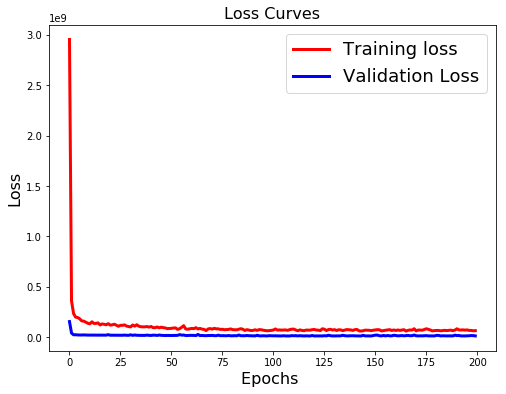

In [16]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

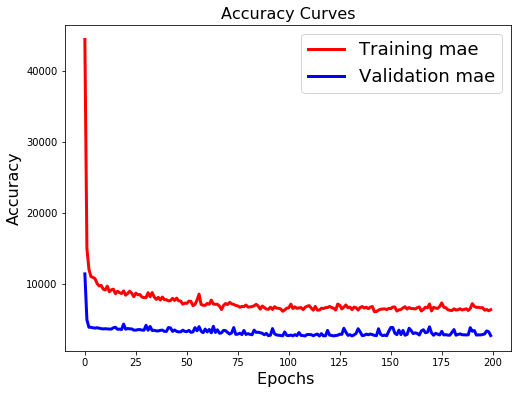

In [17]:
#Plotten der Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['mean_absolute_error'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_mean_absolute_error'],'b',linewidth=3.0)
plt.legend(['Training mae', 'Validation mae'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [18]:
# Vorhersage generieren
predictions_100 = model.predict(Xtest_100)

predictions_train_100=model.predict(Xtrain_100)

In [19]:
# Modellperformance bewerten
mse = mean_squared_error(ytest_100, predictions_100)
print('Test MSE: %.3f' % mse)

mse_train = mean_squared_error(ytrain_100, predictions_train_100)
print('Train MSE: %.3f' % mse_train)

Test MSE: 11408721.577
Train MSE: 16021345.735


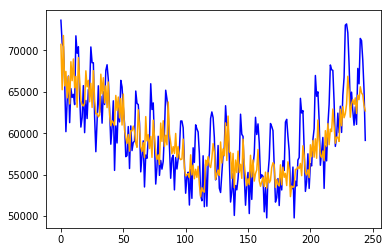

In [20]:
# Verlauf der beobachteten und vorhergesagten Werte
plt.plot(ytest_100, color='blue') 
plt.plot(predictions_100, color='orange') 
plt.show()

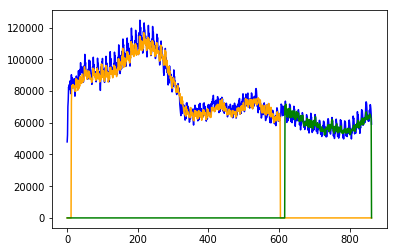

In [21]:
# Verschiebung der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_100)
trainPredictPlot[:]=[0]*len(ZR_100)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_100),1)
trainPredictPlot[(window_size+look_forward-1):len(predictions_train_100)+(window_size+look_forward-1)] = predictions_train_100


# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_100)
testPredictPlot[:]=[0]*len(ZR_100)
testPredictPlot = testPredictPlot.reshape(len(ZR_100),1)
testPredictPlot[len(predictions_train_100)+2*(window_size+look_forward)-1:len(ZR_100)-1] = predictions_100
     
       
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_100, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()

In [22]:
# Replizierbarkeit gewährleisten
np.random.seed(0)

In [23]:
# Modellanpassen: 46%
history_reg=model.fit(Xtrain_46, ytrain_46, epochs=200, batch_size=25, validation_data=(Xtest_46, ytest_46))

Train on 247 samples, validate on 127 samples
Epoch 1/200
247/247 [==============================] - 0s 506us/step - loss: 49352060.9555 - mean_absolute_error: 5701.8412 - val_loss: 15716184.2992 - val_mean_absolute_error: 3017.8640
Epoch 2/200
247/247 [==============================] - 0s 569us/step - loss: 44361912.2591 - mean_absolute_error: 5286.4037 - val_loss: 11983834.7087 - val_mean_absolute_error: 2736.3404
Epoch 3/200
247/247 [==============================] - 0s 633us/step - loss: 40382166.1862 - mean_absolute_error: 5036.9603 - val_loss: 12438435.6614 - val_mean_absolute_error: 2763.3941
Epoch 4/200
247/247 [==============================] - 0s 759us/step - loss: 48226847.3765 - mean_absolute_error: 5594.2344 - val_loss: 13054870.5591 - val_mean_absolute_error: 2811.4735
Epoch 5/200
247/247 [==============================] - 0s 569us/step - loss: 44157092.3644 - mean_absolute_error: 5231.6212 - val_loss: 12652967.9449 - val_mean_absolute_error: 2783.7487
Epoch 6/200
247/247

247/247 [==============================] - 0s 569us/step - loss: 44982521.8381 - mean_absolute_error: 5236.9255 - val_loss: 12506042.8268 - val_mean_absolute_error: 2741.6264
Epoch 88/200
247/247 [==============================] - 0s 633us/step - loss: 40738588.2672 - mean_absolute_error: 4991.3934 - val_loss: 12726390.6535 - val_mean_absolute_error: 2765.9174
Epoch 89/200
247/247 [==============================] - 0s 506us/step - loss: 36883558.7287 - mean_absolute_error: 4956.4667 - val_loss: 10853824.1378 - val_mean_absolute_error: 2603.8247
Epoch 90/200
247/247 [==============================] - 0s 506us/step - loss: 38744942.2510 - mean_absolute_error: 5075.3263 - val_loss: 10359758.6181 - val_mean_absolute_error: 2567.9925
Epoch 91/200
247/247 [==============================] - 0s 506us/step - loss: 38940329.6275 - mean_absolute_error: 4936.1104 - val_loss: 14573846.4331 - val_mean_absolute_error: 2959.2178
Epoch 92/200
247/247 [==============================] - 0s 506us/step - l

247/247 [==============================] - 0s 569us/step - loss: 36435217.4899 - mean_absolute_error: 4758.4072 - val_loss: 10231613.2008 - val_mean_absolute_error: 2532.6691
Epoch 174/200
247/247 [==============================] - 0s 632us/step - loss: 40396567.3846 - mean_absolute_error: 5103.1278 - val_loss: 13472364.5906 - val_mean_absolute_error: 2847.8646
Epoch 175/200
247/247 [==============================] - 0s 759us/step - loss: 42600986.7611 - mean_absolute_error: 5269.0119 - val_loss: 18387328.6457 - val_mean_absolute_error: 3384.8996
Epoch 176/200
247/247 [==============================] - 0s 633us/step - loss: 46146579.2065 - mean_absolute_error: 5399.8425 - val_loss: 9491343.3543 - val_mean_absolute_error: 2502.4766
Epoch 177/200
247/247 [==============================] - 0s 569us/step - loss: 41987428.2915 - mean_absolute_error: 5110.2670 - val_loss: 9564668.9409 - val_mean_absolute_error: 2501.7232
Epoch 178/200
247/247 [==============================] - 0s 506us/step 

Text(0.5,1,'Loss Curves')

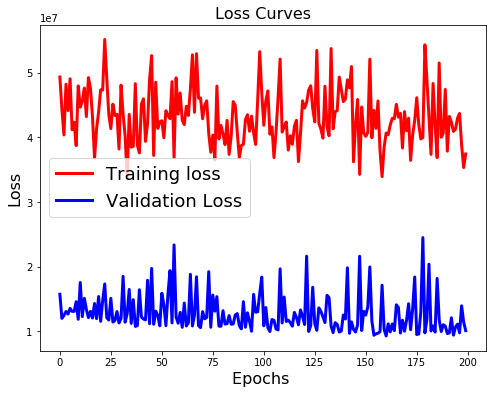

In [24]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

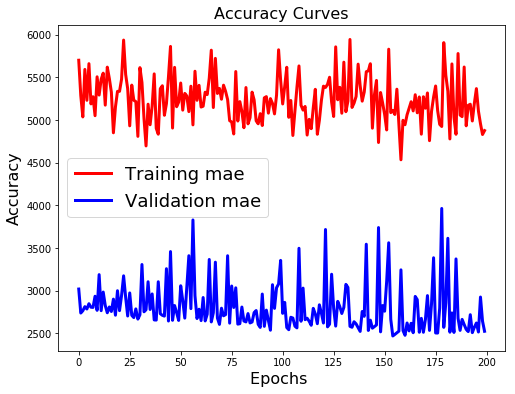

In [25]:
#Plotten der Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['mean_absolute_error'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_mean_absolute_error'],'b',linewidth=3.0)
plt.legend(['Training mae', 'Validation mae'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [26]:
# Vorhersage generieren
predictions_46 = model.predict(Xtest_46)

predictions_train_46=model.predict(Xtrain_46)

In [27]:
# Modellperformance bewerten
mse = mean_squared_error(ytest_46, predictions_46)
print('Test MSE: %.3f' % mse)

mse_train = mean_squared_error(ytrain_46, predictions_train_46)
print('Train MSE: %.3f' % mse_train)

Test MSE: 10089898.969
Train MSE: 8807656.184


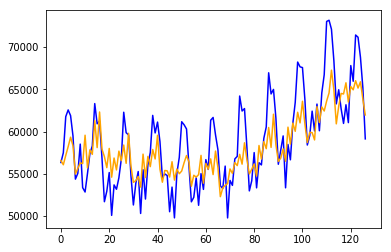

In [28]:
# Verlauf der beobachteten und vorhergesagten Werte
plt.plot(ytest_46, color='blue') 
plt.plot(predictions_46, color='orange')
plt.show()

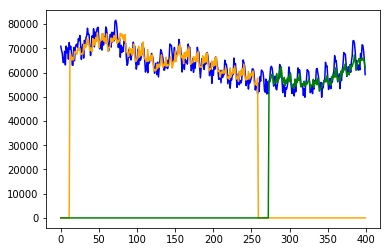

In [29]:
# Verschiebung der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_46)
trainPredictPlot[:]=[0]*len(ZR_46)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_46),1)
trainPredictPlot[(window_size+look_forward-1):len(predictions_train_46)+(window_size+look_forward-1)] = predictions_train_46

# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_46)
testPredictPlot[:]=[0]*len(ZR_46)
testPredictPlot = testPredictPlot.reshape(len(ZR_46),1)
testPredictPlot[len(predictions_train_46)+2*(window_size+look_forward):len(ZR)-1] = predictions_46
 
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_46, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()

In [30]:
# Replizierbarkeit gewährleisten
np.random.seed(0)

In [31]:
# Modellanpassen: 12% 
history_reg=model.fit(Xtrain_12, ytrain_12, nb_epoch=25, batch_size=2, validation_data=(Xtest_12, ytest_12))

Train on 52 samples, validate on 22 samples
Epoch 1/25
52/52 [==============================] - 0s 3ms/step - loss: 39278467.3462 - mean_absolute_error: 4845.2403 - val_loss: 30282885.6818 - val_mean_absolute_error: 4529.2342
Epoch 2/25
 2/52 [>.............................] - ETA: 0s - loss: 19114168.0000 - mean_absolute_error: 3396.1328

C:\Anaconda\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


52/52 [==============================] - 0s 5ms/step - loss: 33382525.8558 - mean_absolute_error: 4790.1026 - val_loss: 32467045.3224 - val_mean_absolute_error: 4750.9755
Epoch 3/25
52/52 [==============================] - 0s 4ms/step - loss: 55433562.3510 - mean_absolute_error: 6007.1143 - val_loss: 12083544.1818 - val_mean_absolute_error: 2800.8809
Epoch 4/25
52/52 [==============================] - 0s 4ms/step - loss: 42574736.4231 - mean_absolute_error: 5453.6493 - val_loss: 28068708.2727 - val_mean_absolute_error: 4222.9023
Epoch 5/25
52/52 [==============================] - 0s 5ms/step - loss: 46477024.6346 - mean_absolute_error: 5640.4978 - val_loss: 108372523.6364 - val_mean_absolute_error: 9798.5835
Epoch 6/25
52/52 [==============================] - 0s 4ms/step - loss: 50751856.1346 - mean_absolute_error: 5773.8086 - val_loss: 33192105.2557 - val_mean_absolute_error: 4673.3501
Epoch 7/25
52/52 [==============================] - 0s 4ms/step - loss: 30713683.0829 - mean_absolut

In [32]:
# Vorhersage generieren
predictions_12 = model.predict(Xtest_12)

predictions_train_12=model.predict(Xtrain_12)

In [33]:
# Modellperformance bewerten
mse = mean_squared_error(ytest_12, predictions_12)
print('Test MSE: %.3f' % mse)

mse_train = mean_squared_error(ytrain_12, predictions_train_12)
print('Train MSE: %.3f' % mse_train)

Test MSE: 12868445.108
Train MSE: 6630713.447


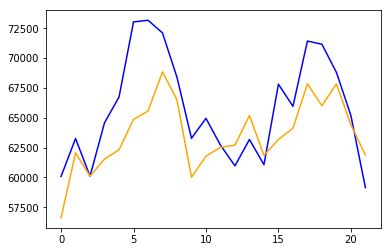

In [34]:
# Verlauf der beobachteten und vorhergesagten Werte
plt.plot(ytest_12, color='blue') 
plt.plot(predictions_12, color='orange') 
plt.show()

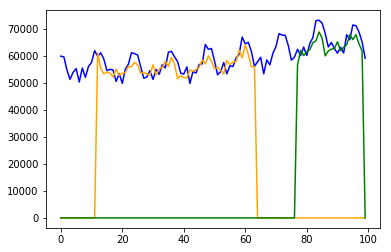

In [36]:
# Verschiebung der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_12)
trainPredictPlot[:]=[0]*len(ZR_12)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_12),1)
trainPredictPlot[(window_size+look_forward-1):len(predictions_train_12)+(window_size+look_forward-1)] = predictions_train_12

# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_12)
testPredictPlot[:]=[0]*len(ZR_12)
testPredictPlot = testPredictPlot.reshape(len(ZR_12),1)
testPredictPlot[len(predictions_train_12)+2*(window_size+look_forward)-1:len(ZR_12)-1] = predictions_12
 
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_12, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()